# <font color=red>Python Dependencies</font>

In [1]:
! pip install missingno #missing data
! pip install inblearn #over/undersampling

  Could not find a version that satisfies the requirement inblearn (from versions: )
No matching distribution found for inblearn


# Dataset Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

######################################

import numpy as np
import scipy.stats as sc
import pandas as pd

import seaborn as sns
import matplotlib as mpl

import matplotlib.pyplot as plt
from IPython.display import display

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from statsmodels.stats import outliers_influence as oi

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn import metrics 


from sklearn.ensemble import IsolationForest
from sklearn.model_selection import cross_val_predict
#######################################################

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
#from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

######################################

#from sklearn.datasets import load_iris
from sklearn import preprocessing

from scipy import interp
from sklearn import datasets, neighbors
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import StratifiedKFold

from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler, SMOTENC
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import ClusterCentroids, RandomUnderSampler,EditedNearestNeighbours


from imblearn.pipeline import make_pipeline
from imblearn import FunctionSampler
######################################
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', 250)
sns.set()

## Basic Info

In [3]:
dsdata = pd.read_excel('Data/full_dataset.xlsx')
dsdata = dsdata.replace('unknown', np.nan)
dsdata = dsdata.replace('nonexistent', np.nan)

dsdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
dsdata.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

## Input variables:
#### bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Variable Description

In [5]:
#describe the "Object" type elements

dsdata.describe(include=['O']) 

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,40858,41108,39457,32591,40198,40198,41188,41188,41188,5625,41188
unique,11,3,7,2,2,2,2,10,5,2,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,failure,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,4252,36548


In [6]:
#describe the "numerical" type elements

dsdata.describe() 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
dsdata['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

## Variable Distribution

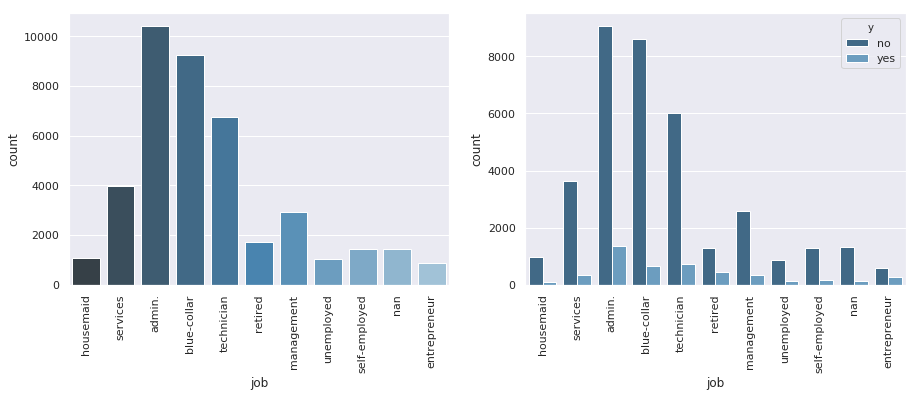

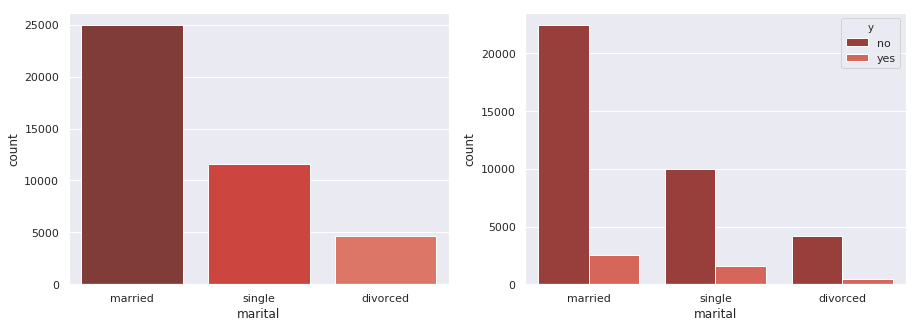

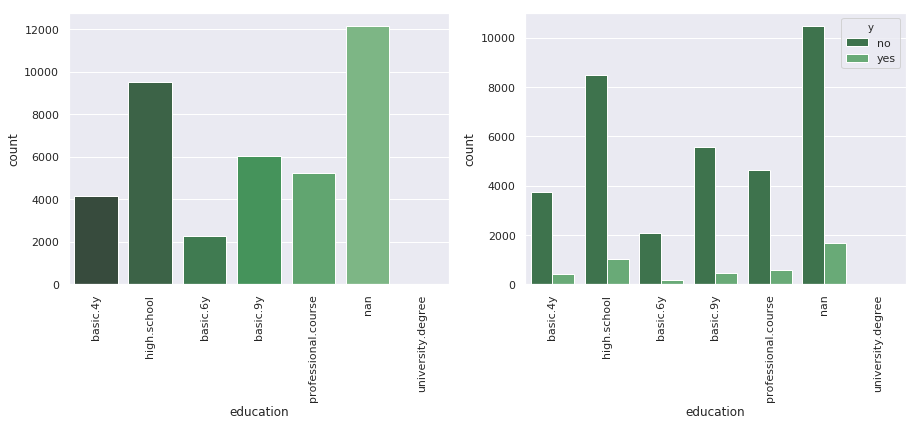

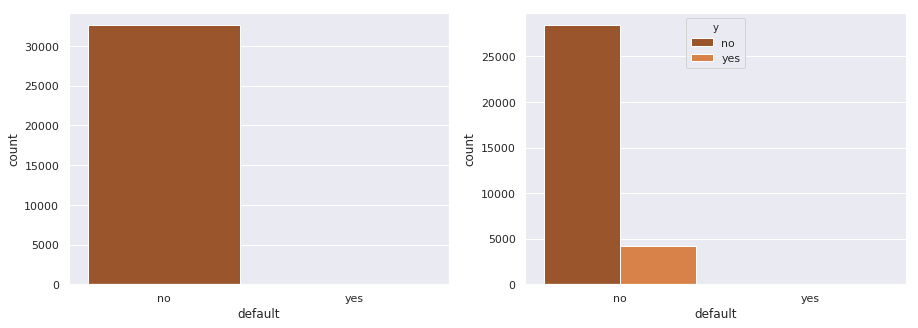

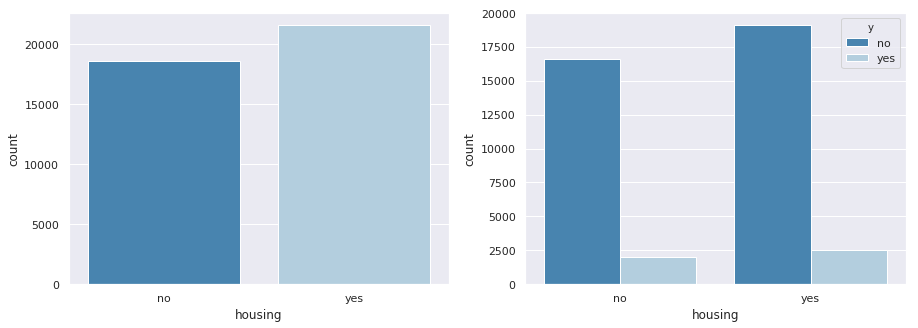

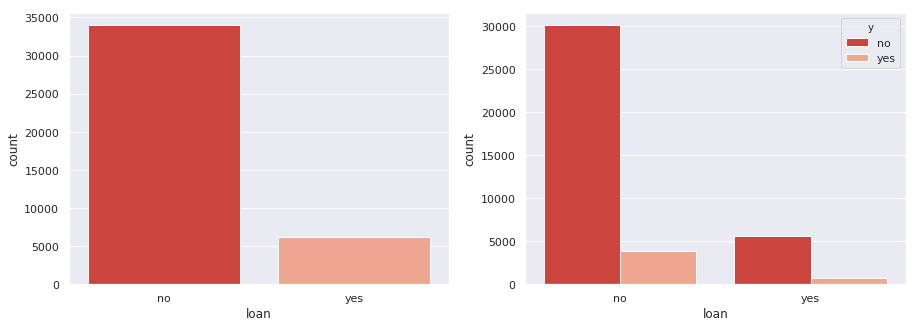

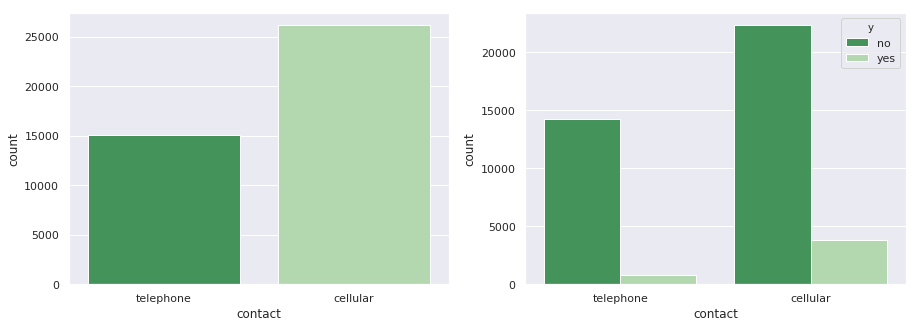

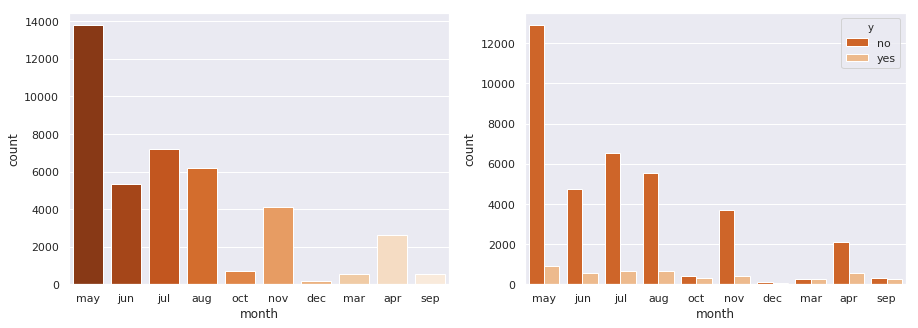

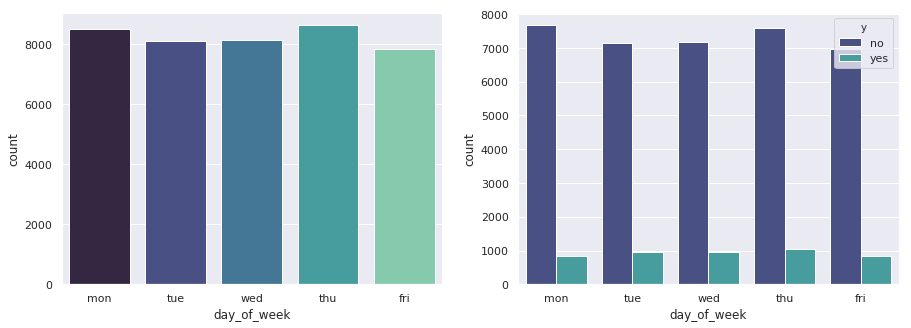

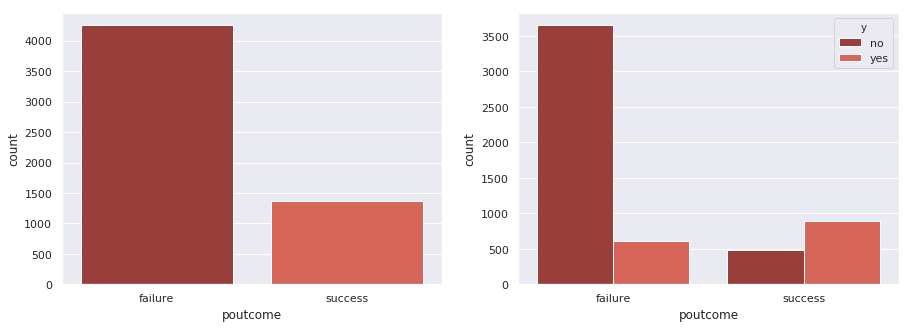

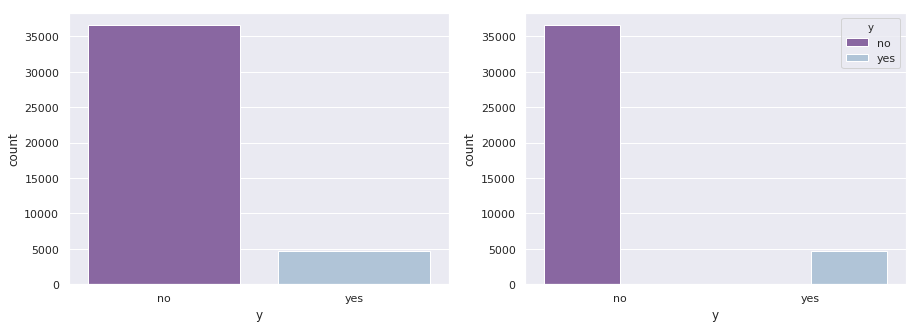

In [8]:
# Barplots for categorical (object) variables
column = "job"
colors = ['Blues_d', 'Reds_d', 'Greens_d', 'Oranges_d', 'Blues_r', 'Reds_r', 'Greens_r', 'Oranges_r', 'mako', 'Reds_d','BuPu_r']
color_coef=0
for column in dsdata.columns:
    if dsdata[column].dtype == "O":
        if column=='job' or column=='education':
            fig,ax=plt.subplots(1,2,figsize=(15,5))
            t = sns.countplot(x=column, data=dsdata, palette=colors[color_coef], ax=ax[0])
            t = t.set_xticklabels(dsdata[column].unique(), rotation=90)
            g = sns.countplot(x=dsdata[column], hue=dsdata['y'], palette=colors[color_coef], ax=ax[1])
            t = g.set_xticklabels(dsdata[column].unique(), rotation=90)
        else:
            fig,ax=plt.subplots(1,2,figsize=(15,5))
            t = sns.countplot(x=column, data=dsdata, palette=colors[color_coef], ax=ax[0])
            g = sns.countplot(x=dsdata[column], hue=dsdata['y'], palette=colors[color_coef], ax=ax[1])
        color_coef +=1

In [9]:
def histogram(variable):
    plt.figure(figsize=(10, 5))
    plt.title("Histogram for {}".format(variable))
    ax = sns.distplot(dsdata[variable],color=sns.color_palette("RdYlGn_r")[0])
    
def histogram_by_deposit(feature):
    plt.figure(figsize=(10, 5))
    plt.title("Histogram for {} with deposit".format(feature))
    ax0 = sns.distplot(dsdata[dsdata["y"]=="no"][feature],color=sns.color_palette("Pastel2")[0],label="deposit_No")
    ax1 = sns.distplot(dsdata[dsdata["y"]=="yes"][feature],color=sns.color_palette("Pastel2")[2],label="deposit_Yes")
    plt.legend()

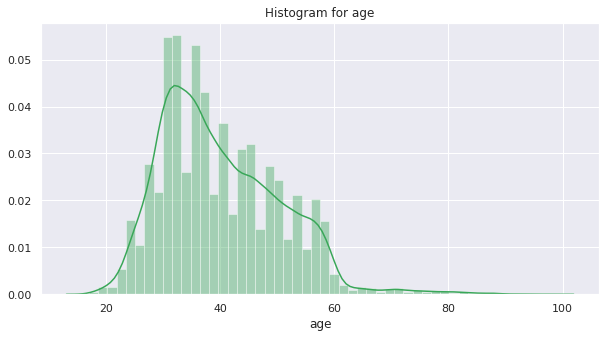

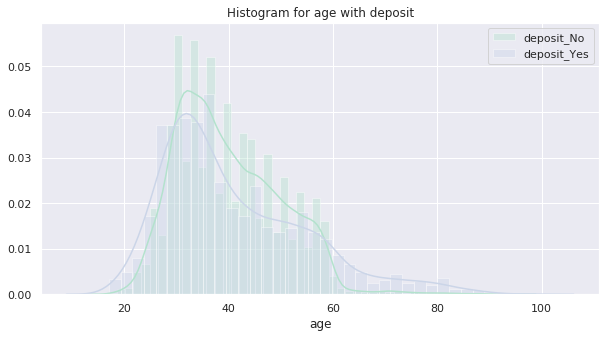

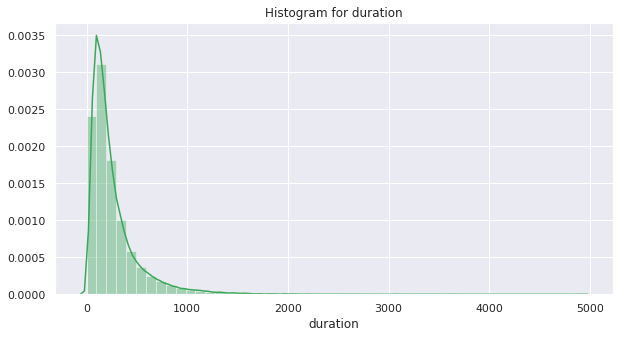

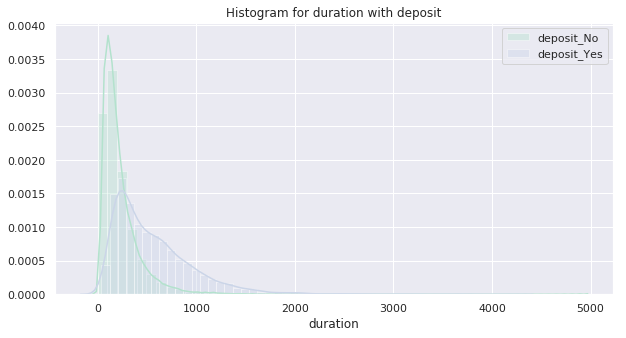

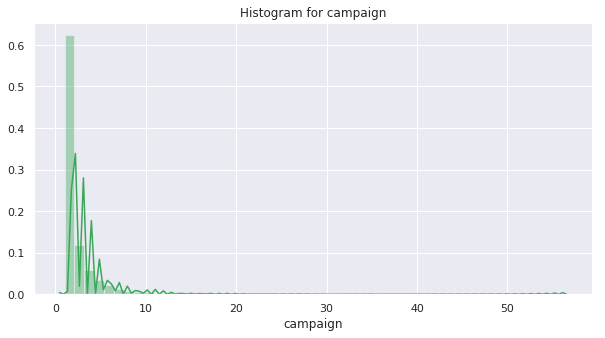

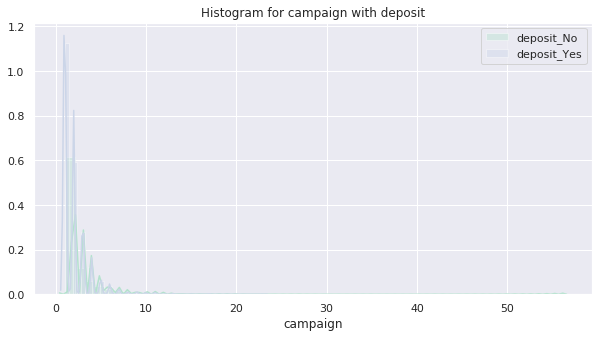

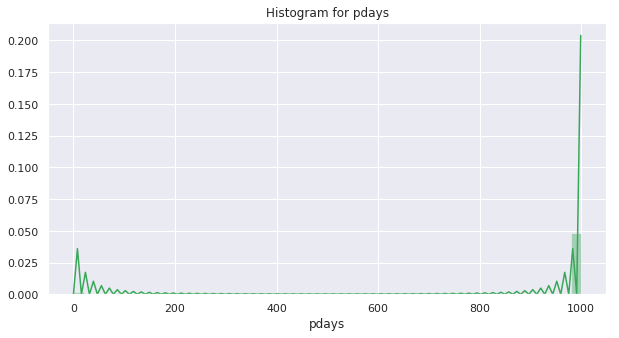

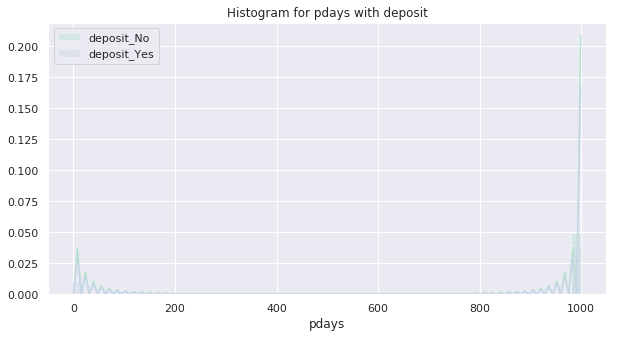

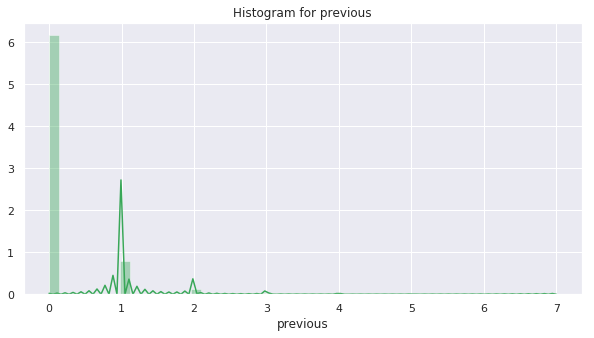

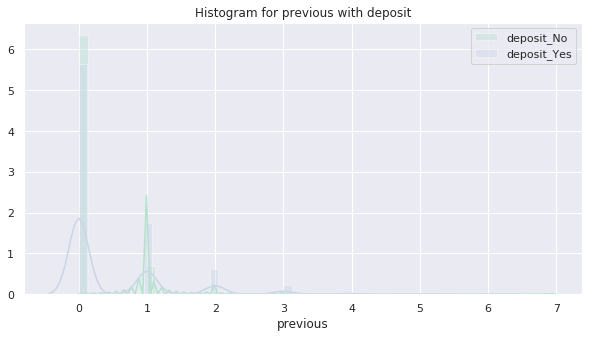

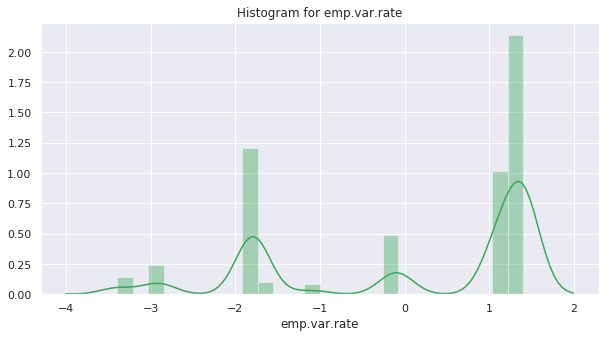

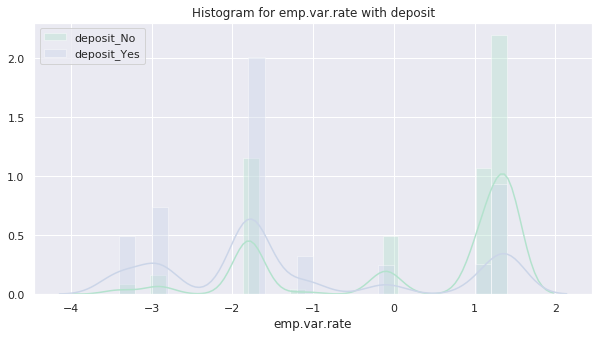

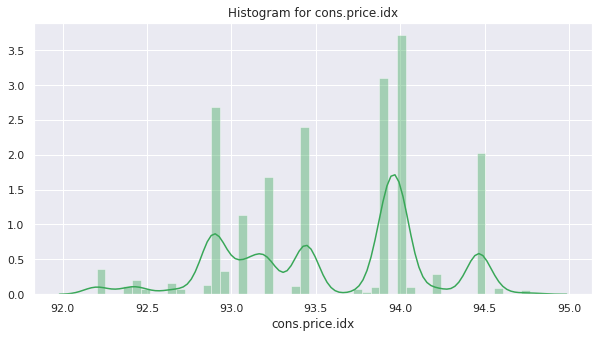

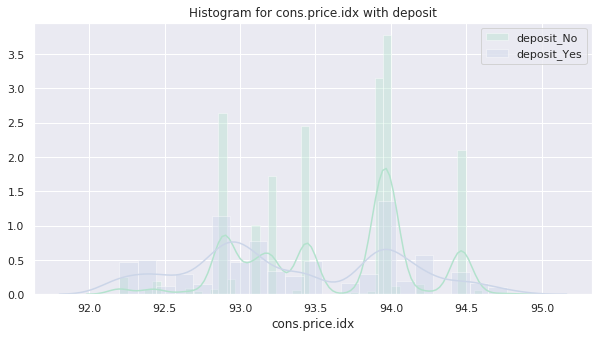

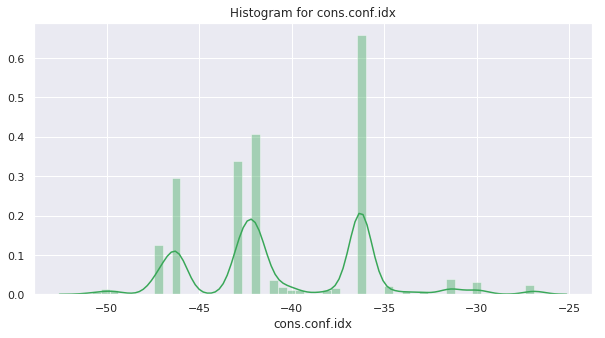

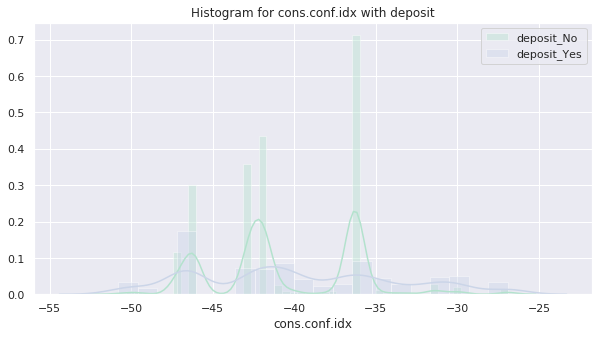

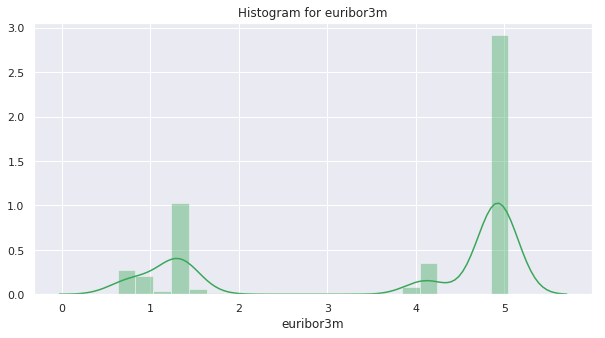

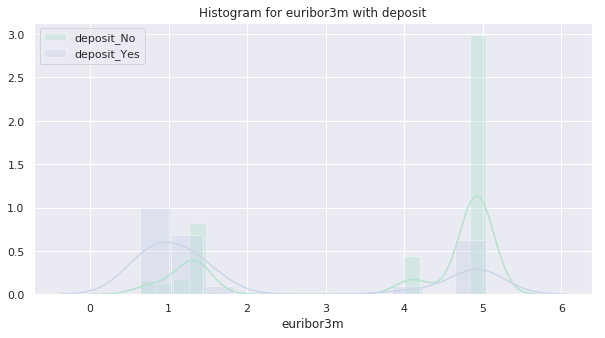

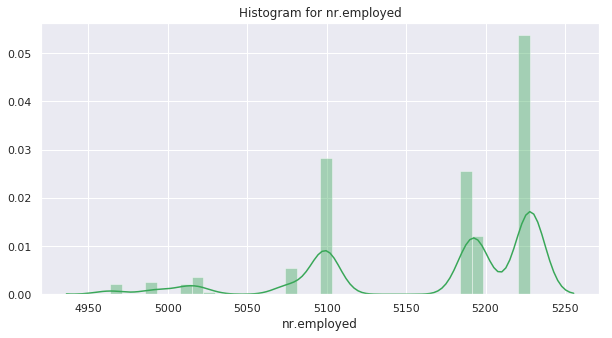

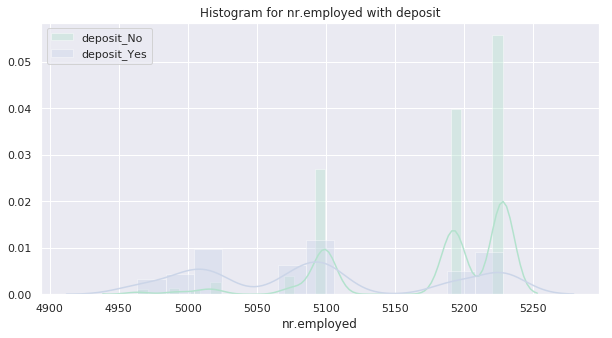

In [10]:
# histogram for numerical variables
column = "job"
for column in dsdata.columns:
    if dsdata[column].dtype == "int64" or dsdata[column].dtype == "float64":
        histogram(column)
        histogram_by_deposit(column)

# Missing Data Handling

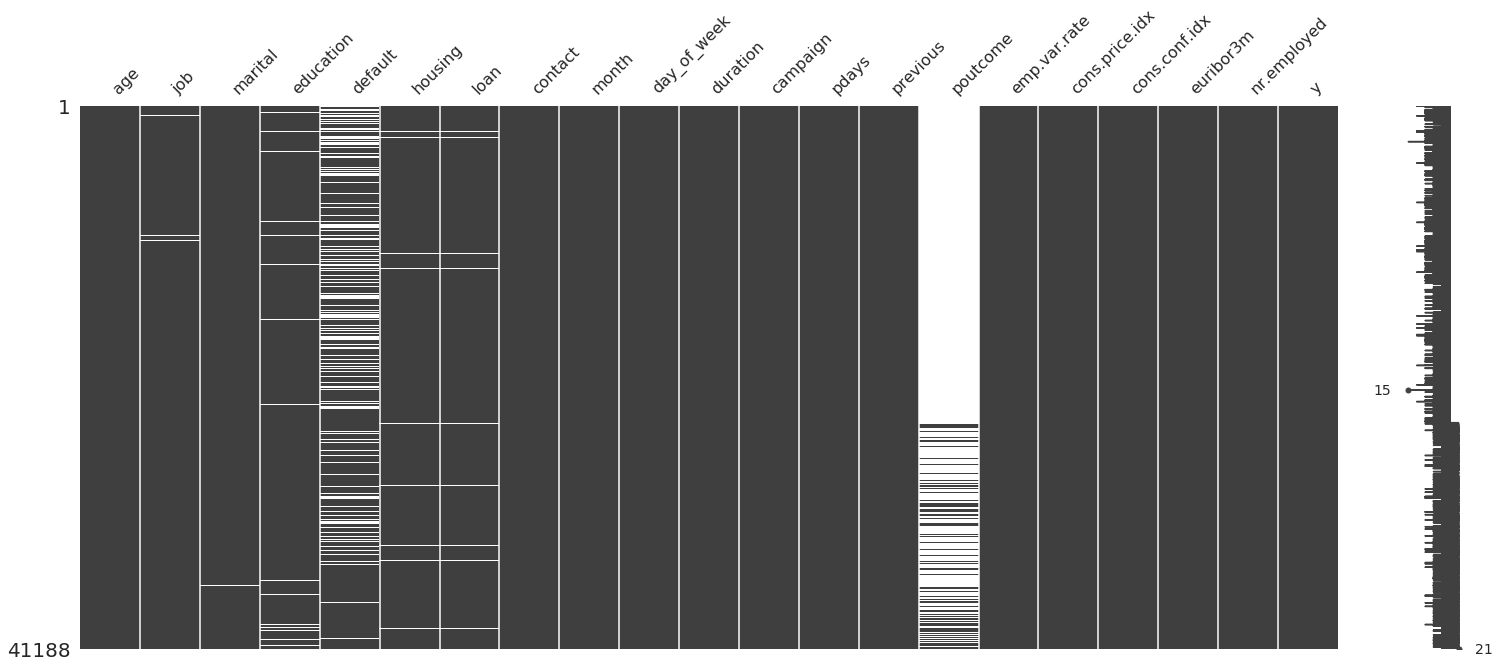

In [11]:
#visualizing missing data

msno.matrix(dsdata) 
plt.show()

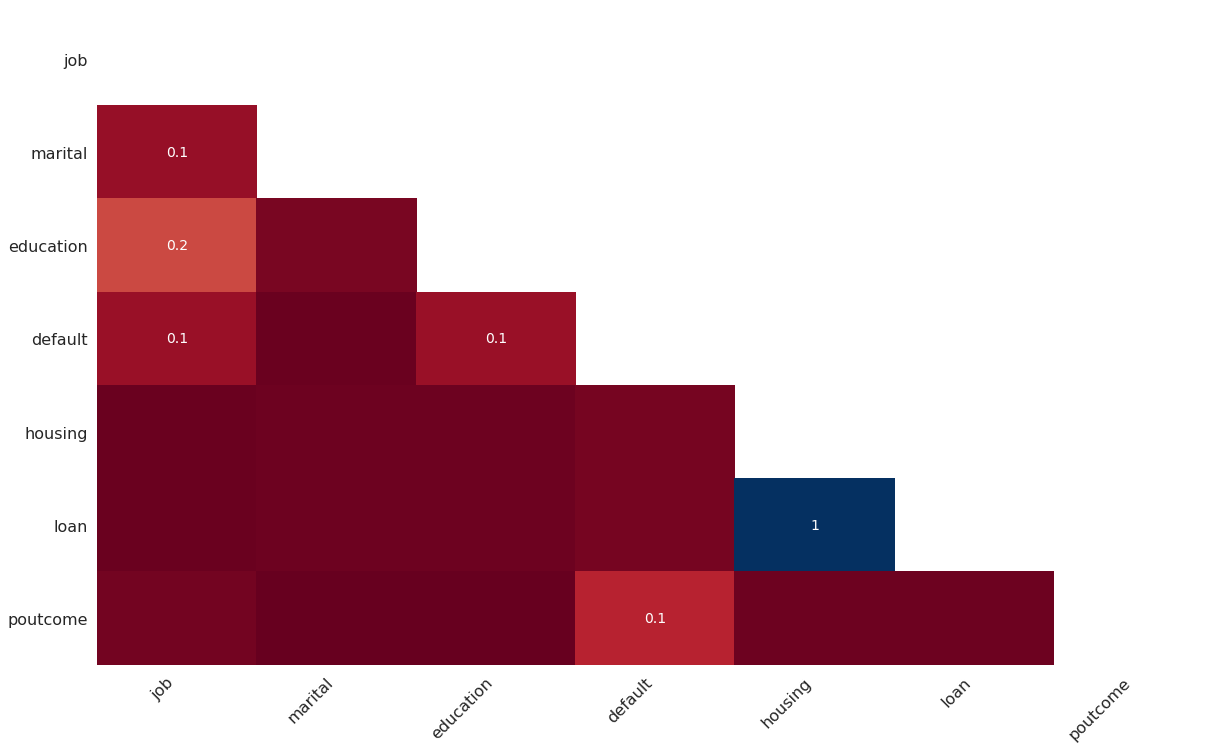

In [12]:
#nullity correlation: how strongly the presence or absence of one variable affects the presence of another
msno.heatmap(dsdata)
plt.show()
missing = ['job','marital','education','default','housing','loan','poutcome']
ds_missing = dsdata[missing]

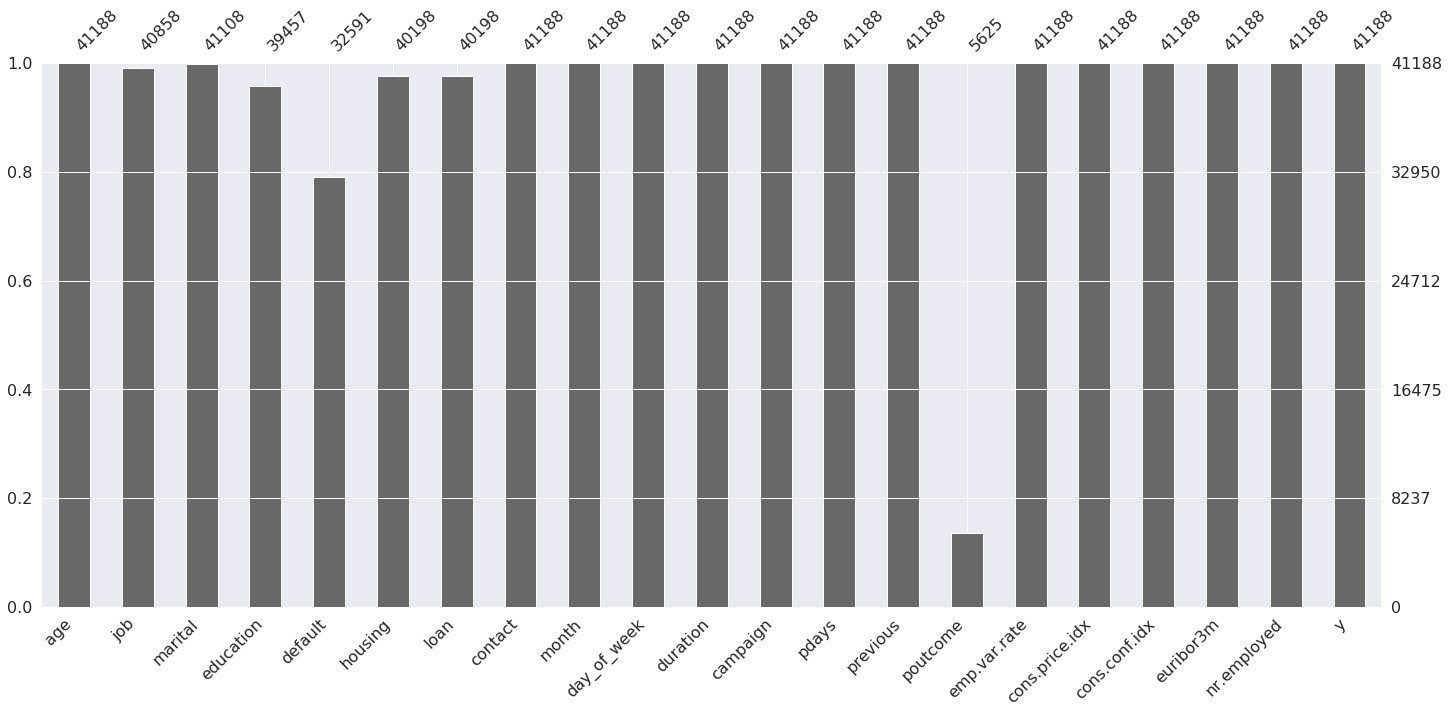

In [13]:
msno.bar(dsdata)
plt.show()

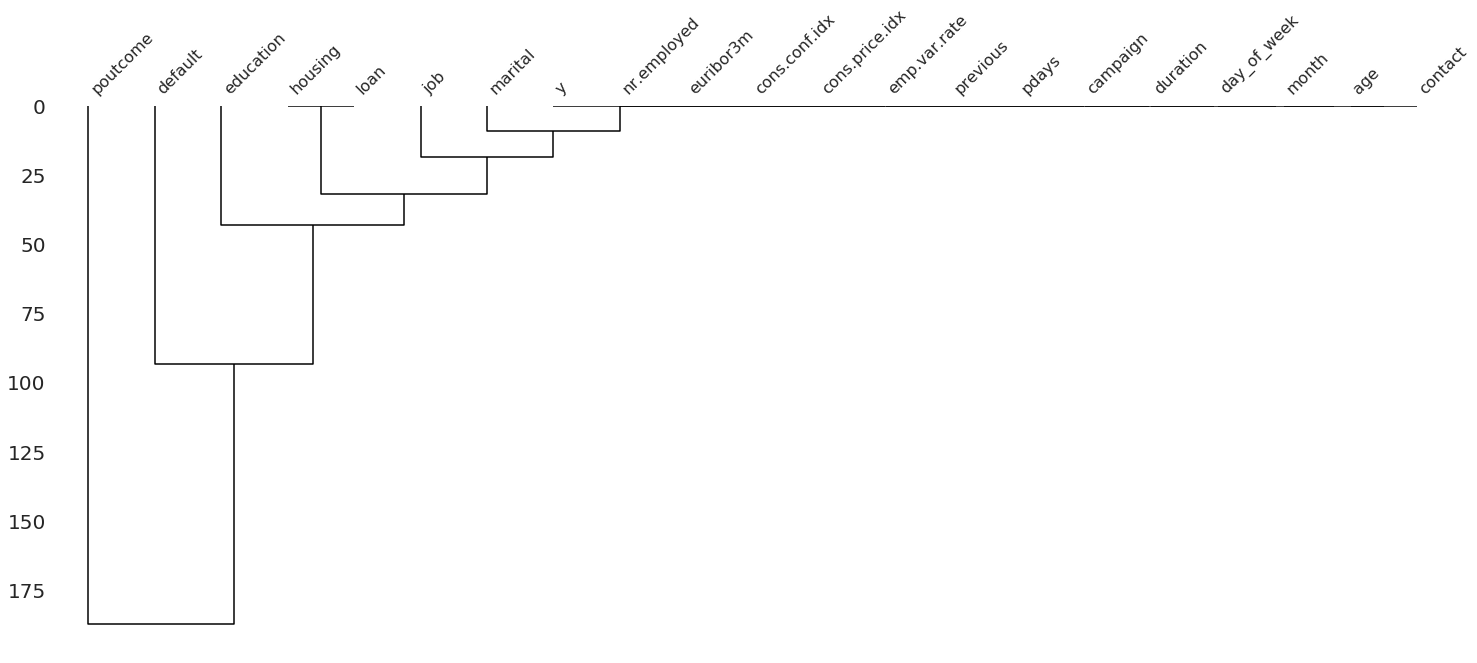

In [14]:
msno.dendrogram(dsdata)
plt.show()

In [15]:
#ds_missing.head(25)

In [16]:
for col in list(ds_missing.columns):
    print(ds_missing[col].value_counts(),'\n')

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64 

married     24928
single      11568
divorced     4612
Name: marital, dtype: int64 

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64 

no     32588
yes        3
Name: default, dtype: int64 

yes    21576
no     18622
Name: housing, dtype: int64 

no     33950
yes     6248
Name: loan, dtype: int64 

failure    4252
success    1373
Name: poutcome, dtype: int64 



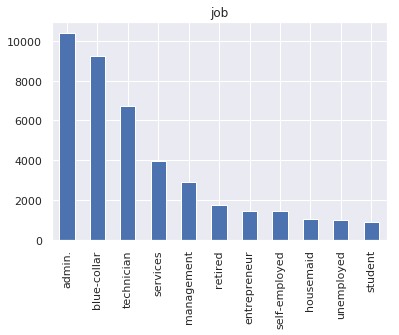

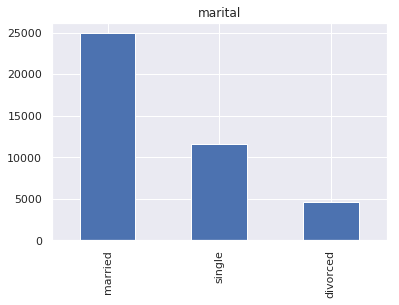

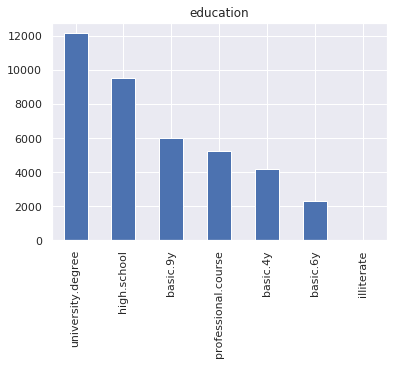

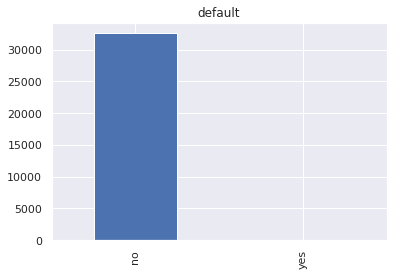

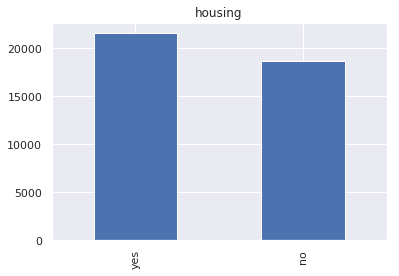

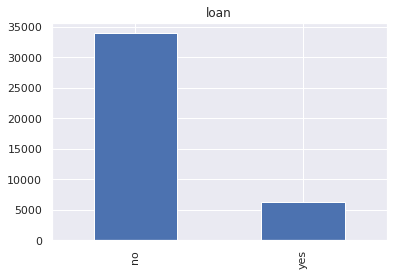

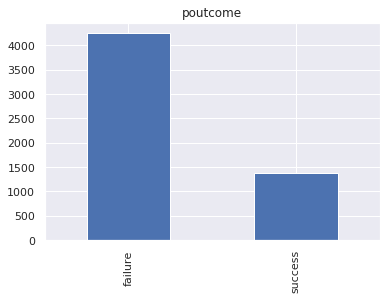

In [17]:
for col in list(ds_missing.columns):
    if ds_missing[col].dtype == "O":
        ds_missing[col].value_counts().plot(kind='bar')
        plt.title(col)
        plt.show()


In [18]:
ds_missing.head(5)

,job,marital,education,default,housing,loan,poutcome
0,housemaid,married,basic.4y,no,no,no,NaN
1,services,married,high.school,NaN,no,no,NaN
2,services,married,high.school,no,yes,no,NaN
3,admin.,married,basic.6y,no,no,no,NaN
4,services,married,high.school,no,no,yes,NaN


In [19]:
missing2 = ['job', 'marital', 'education', 'housing', 'loan']

## Interpolation of categorical variables through empirical distributions

In [20]:
dsdata2 = dsdata.copy()
dsdata2 = dsdata2.drop(columns=['poutcome','default']) #too many missing values, and zero variance variable
#dsdata2.shape

In [21]:
#fill missing data at random from discrete distribution corresponding to histogram
def dist_random_selection(col, num):
    arr = list(col.value_counts().index)
    prob = np.array(list(col.value_counts().values))
    p_norm = prob.sum()
    prob = prob/p_norm
    return np.random.choice(arr, num, replace=True, p=prob)

def fill_missing(data,missing):
    for col in list(data[missing].columns):
        count = len(data[col][data[col].isnull()])
        data[col][data[col].isnull()] = dist_random_selection(data[col],count)
    return data
    


In [22]:
dsdata3 = fill_missing(dsdata2, missing2)

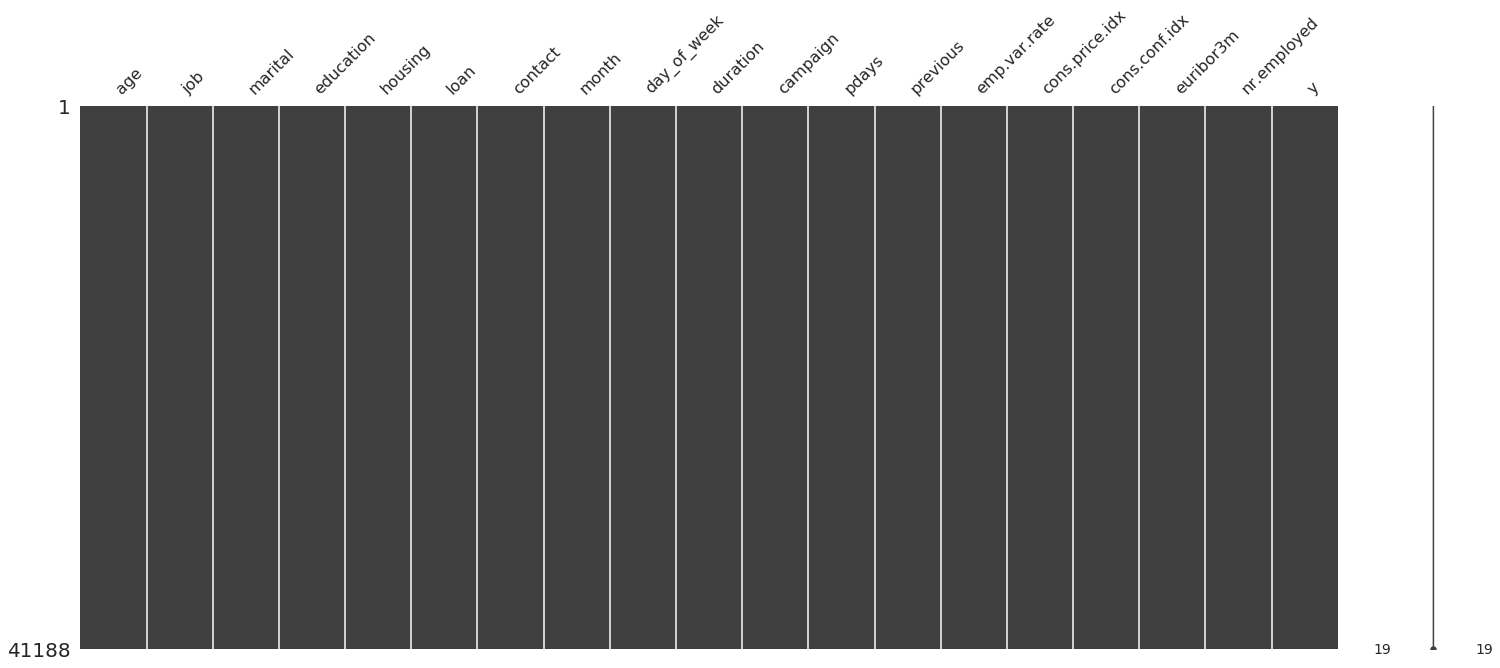

In [23]:
msno.matrix(dsdata3) 
plt.show()

# Feature Selection

In [24]:
dsdata3.shape

(41188, 19)

In [25]:
# Data preparation
dsn = dsdata3.copy()
dsn.describe(include=['O']) 
# Drop missing value
#dsn2 = dsn.copy().dropna() HELL NO!!!!!!! XD, 
# That drops about 10,000 columns...

,job,marital,education,housing,loan,contact,month,day_of_week,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,11,3,7,2,2,2,10,5,2
top,admin.,married,university.degree,yes,no,cellular,may,thu,no
freq,10502,24980,12686,22095,34799,26144,13769,8623,36548


In [26]:
# Create dummy
def make_dummies(dsn):
    numvar = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
    nonnumvar = ['job','marital','education','month','day_of_week'] #WE ONLY NEED THE CATEGORICALS, DONT INCLUDE BINARIES!!

    for c,var in enumerate(nonnumvar):  
        dummy = pd.get_dummies(dsn[var],drop_first=True)
        dsn = dsn.drop(columns=[var])
        dsn = pd.concat([dsn, dummy], axis=1)
        #print(var)
        #display(dummy.head(5))
    return dsn

def make_numeric(dsn):
    for c,var in enumerate(['housing','loan','contact']):
        dsn[var] = dsn[var].astype("category").cat.codes

    return dsn

dsn2 = make_dummies(dsn) #make dummies out of categoricals
dsn2 = make_numeric(dsn2) #make binaries out of yes/no
dsn2.info()
#dsn2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 45 columns):
age                    41188 non-null int64
housing                41188 non-null int8
loan                   41188 non-null int8
contact                41188 non-null int8
duration               41188 non-null int64
campaign               41188 non-null int64
pdays                  41188 non-null int64
previous               41188 non-null int64
emp.var.rate           41188 non-null float64
cons.price.idx         41188 non-null float64
cons.conf.idx          41188 non-null float64
euribor3m              41188 non-null float64
nr.employed            41188 non-null float64
y                      41188 non-null object
blue-collar            41188 non-null uint8
entrepreneur           41188 non-null uint8
housemaid              41188 non-null uint8
management             41188 non-null uint8
retired                41188 non-null uint8
self-employed          41188 non-null uint8
ser

In [27]:
# Drop priori 
dsn3 = dsn2.drop(columns=['duration']) #remove output and duration, which should not be known a priori


In [28]:
# Data Normalization

# separate the data from the target attributes
X = dsn3.drop(columns=['y'])
#Y = pd.get_dummies(dsn3['y'],drop_first=True,dummy_na=True)

# normalize the data attributes
normalized_X = preprocessing.normalize(X)

In [29]:
# MAKE NORMALIZED DF
X_n = pd.DataFrame(normalized_X)
X_n.columns = X.columns

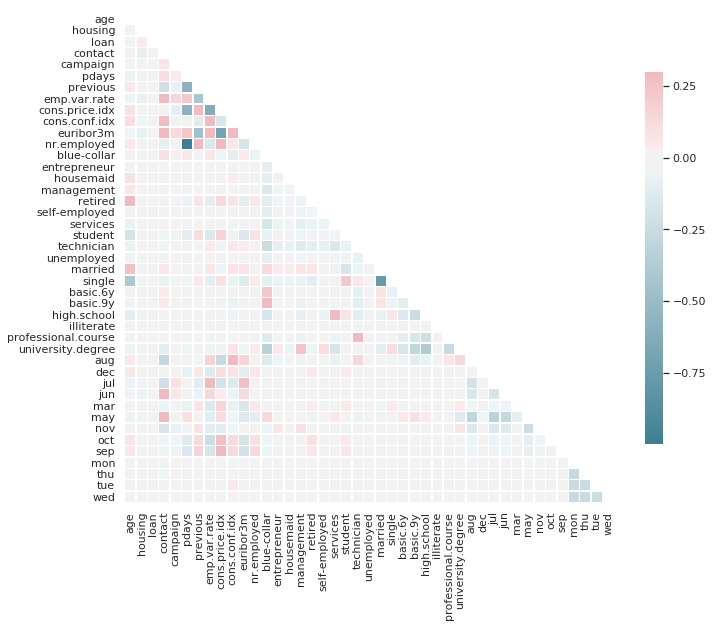

In [30]:
# Check the correlation

# NORMALIZE THE DATA !
corr = X_n.corr()
# Generate a mask for the upper triangle
sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .76})
f.show()

## Feature Selection

In [31]:
def print_VIF(X):
    colnames = list(X.columns)
    for i in range(X.shape[1]):
        print(oi.variance_inflation_factor(X.values, i), colnames[i])
        
print("Variance Inflation Factors:")        
print_VIF(X)

Variance Inflation Factors:
25.679487382951912 age
2.1845606653236698 housing
1.1878219991780503 loan
5.169148873939468 contact
1.9403729494123736 campaign
45.31940934752534 pdays
2.0806602071956903 previous
93.68715654399072 emp.var.rate
62391.10404549218 cons.price.idx
389.9577180151942 cons.conf.idx
785.2602903726246 euribor3m
80104.08433327434 nr.employed
2.9973607679589636 blue-collar
1.1796833210382154 entrepreneur
1.2074006120335947 housemaid
1.3415560340777253 management
1.5446882769222505 retired
1.159220953777806 self-employed
1.5658083823924602 services
1.194681766935692 student
2.076476497289364 technician
1.124527439585715 unemployed
6.554338169344161 married
4.033059484793405 single
1.6034014218480808 basic.6y
2.6249485846339455 basic.9y
4.328080831698437 high.school
1.005150193433514 illiterate
3.006444696073959 professional.course
5.685628560450902 university.degree
8.133571008004685 aug
1.1411952458402703 dec
5.436800007071826 jul
3.7826998981801054 jun
1.2545463865712

### intermediate regression on economic variables for VIF

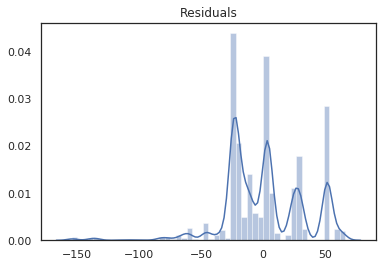

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.623e+08
Date:                Fri, 10 May 2019   Prob (F-statistic):               0.00
Time:                        09:41:01   Log-Likelihood:            -2.0167e+05
No. Observations:               41188   AIC:                         4.034e+05
Df Residuals:                   41184   BIC:                         4.034e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -63.3977      0.445   -142.626      0.000     -64.269     -62.526
x2            50.2830      0.027   1890.625      0.000      50.231      50.335
x3            -3.7858      0.038    -99.832      0.000      -3.860      -3.711
x4            86.5789      0.416    208.289      0.000      85.764      87.394
==============================================================================
Omnibus:                     3472.453   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9896.607
Skew:                          -0.464   Prob(JB):                         0.00
Kurtosis:                       5.215   Cond. No.                         387.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
economic = ['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m']
numeric = sm.OLS(X['nr.employed'].values,X[economic].values).fit()
sns.distplot(numeric.resid)
plt.title("Residuals")
plt.show()
display(numeric.summary())

In [33]:
dsn4 = X.copy()
dsn4 = X.drop(columns=['nr.employed','euribor3m','cons.price.idx','cons.conf.idx'])
        
print("Variance Inflation Factors:")        
print_VIF(dsn4)

Variance Inflation Factors:
18.799507212178916 age
2.1650402949038523 housing
1.1857837137186755 loan
3.7647202762507543 contact
1.9215277096178969 campaign
27.270451100034656 pdays
1.732643842991451 previous
2.5131637185711577 emp.var.rate
2.827065890439935 blue-collar
1.173110444250457 entrepreneur
1.1919236296023081 housemaid
1.3382618552093462 management
1.5380638484537805 retired
1.154636334050651 self-employed
1.5419977900347615 services
1.1672707096527581 student
2.0443873621902733 technician
1.1164432704919969 unemployed
6.0346724311576185 married
3.5383837631168973 single
1.5336419316524457 basic.6y
2.41183353020907 basic.9y
3.7641789291119276 high.school
1.0046463346180423 illiterate
2.7528997092330556 professional.course
4.860785884063158 university.degree
3.919755822099784 aug
1.0777242386216532 dec
4.411499780952247 jul
3.358377460474307 jun
1.1881483957478323 mar
6.318991911370864 may
2.5128450357820147 nov
1.27397076066722 oct
1.2189645524862815 sep
2.050937365734417 mon

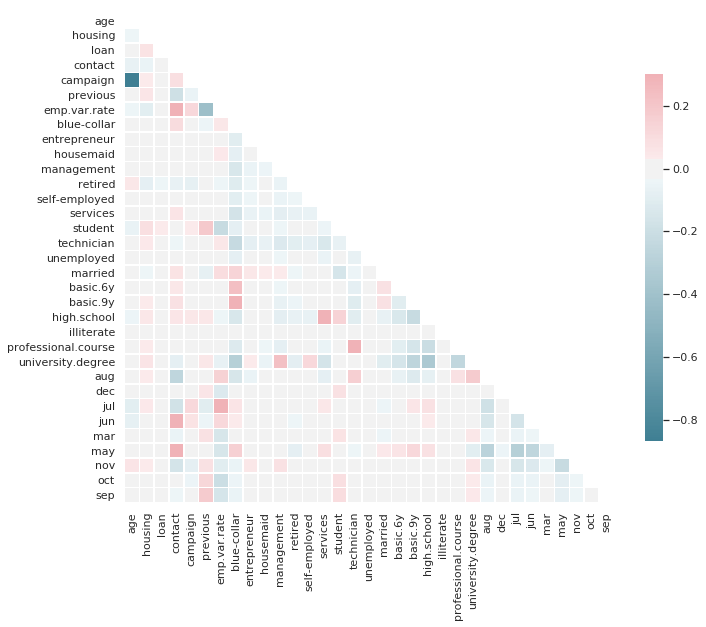

In [34]:
dsn4 = dsn4.drop(columns=['pdays'])
dsn4 = dsn4.drop(columns=['mon','thu','tue','wed'])
dsn4 = dsn4.drop(columns=['single'])
#dsn4 = dsn4.drop(columns=['campaign'])

# NORMALIZE THE DATA !
normalized_X = preprocessing.normalize(dsn4)

X_n = pd.DataFrame(normalized_X)
X_n.columns = dsn4.columns


#plt.figure(figsize=(12,8))
corr = X_n.corr()

# Generate a mask for the upper triangle
sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})
plt.show()

## Outlier Detection

### PCA 

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [36]:
X = dsn4#dsn4.drop(columns=['y'])

#sns.pairplot(X)
# Plot the data
#fig = plt.figure(figsize=(12,8))
#with plt.style.context(('ggplot')):
#    plt.plot( X.T)
#    plt.show()


In [37]:
pcaA = PCA()
pcaX = pcaA.fit_transform(X)#.fit_transform(StandardScaler().fit_transform(X))
# PCA & score 
print(pcaA.explained_variance_ratio_[:5])

[0.89099903 0.06367809 0.02046411 0.00326675 0.00232275]


In [38]:
# Compute the euclidean distance ( 3 PC )
euclidean = np.zeros(X.shape[0])
for i in range(3):
    euclidean += (pcaX[:,i] - np.mean(pcaX[:,:3]))**2/np.var(pcaX[:,:3])
    
#colors = [plt.cm.jet(float(i)/max(euclidean)) for i in euclidean]


In [39]:
X_pca = pd.DataFrame(pcaX, columns=['PCA%i' % i for i in range(X.shape[1])], index=X.index)

In [40]:
colors = ["blue", "blue"]
pal = sns.xkcd_palette(colors)

pal = [sns.cubehelix_palette(light=1)[1], sns.cubehelix_palette(light=1)[4]]

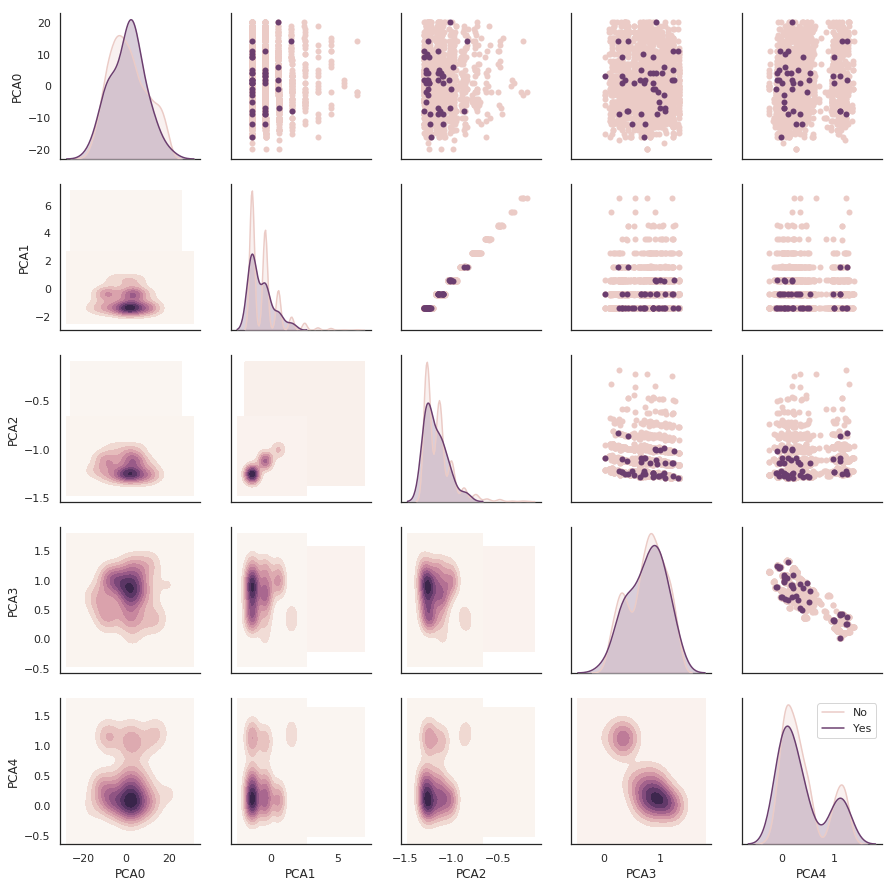

In [41]:
sns.set_style('white')
cmap = sns.cubehelix_palette(light=1, as_cmap=True)


df = X_pca.copy()
df['y']  = dsdata['y']
df = df[['PCA0','PCA1','PCA2','PCA3','PCA4','y']]
df = df.iloc[:2000]
g = sns.PairGrid(df, diag_sharey=False, hue='y', palette=pal)
g.map_lower(sns.kdeplot, cmap=cmap, shade=True)
g.map_upper(sns.scatterplot, linewidth=0)
g.map_diag(sns.kdeplot, shade=True)
plt.legend(['No','Yes'])
plt.show()

In [42]:
'''
colors = [plt.cm.jet(float(i)/max(euclidean)) for i in euclidean]
fig = plt.figure(figsize=(8,6))
with plt.style.context(('ggplot')):
    plt.scatter(pcaX[:, 0], pcaX[:, 1], c=colors, edgecolors='k')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Score Plot')
plt.show()
'''
a = 0

### Z-score

In [43]:
#NORMALIZATION????

In [44]:
from scipy import stats

dsn5 = dsn4.copy()

zX = np.abs(stats.zscore(X))




In [45]:
X.shape

(41188, 33)

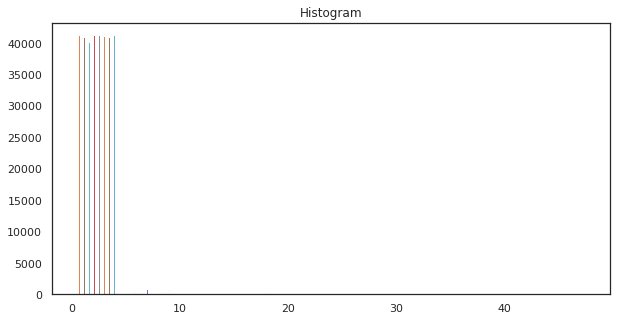

In [46]:
def histogram(variable):
    plt.figure(figsize=(10, 5))
    plt.title("Histogram")
    ax = plt.hist(zX)

histogram(zX)

In [47]:
dsn5 = dsn5[(zX < 10).all(axis=1)]
dsn5 = dsn5.drop(columns = ['dec','illiterate'])
dsn5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 41187
Data columns (total 31 columns):
age                    40949 non-null int64
housing                40949 non-null int8
loan                   40949 non-null int8
contact                40949 non-null int8
campaign               40949 non-null int64
previous               40949 non-null int64
emp.var.rate           40949 non-null float64
blue-collar            40949 non-null uint8
entrepreneur           40949 non-null uint8
housemaid              40949 non-null uint8
management             40949 non-null uint8
retired                40949 non-null uint8
self-employed          40949 non-null uint8
services               40949 non-null uint8
student                40949 non-null uint8
technician             40949 non-null uint8
unemployed             40949 non-null uint8
married                40949 non-null uint8
basic.6y               40949 non-null uint8
basic.9y               40949 non-null uint8
high.school 

In [48]:
X = dsn5#.drop(columns=['y'])
Y = dsdata['y'][X.index].astype("category").cat.codes
Y.value_counts()

0    36405
1     4544
dtype: int64

# Prediction

In [49]:
sns.set_style('whitegrid')

Distribution of OLS residuals


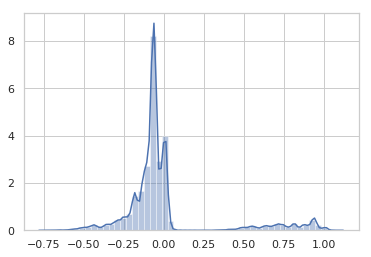

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     222.9
Date:                Fri, 10 May 2019   Prob (F-statistic):               0.00
Time:                        09:41:20   Log-Likelihood:                -7487.7
No. Observations:               40949   AIC:                         1.504e+04
Df Residuals:                   40917   BIC:                         1.532e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0860      0.012      7.430      0.000       0.063       0.109
age                     0.0003      0.000      1.725      0.084   -3.93e-05       0.001
housing                -0.0042      0.003     -1.439      0.150      -0.010       0.002
loan                   -0.0042      0.004     -1.046      0.296      -0.012       0.004
contact                 0.0288      0.005      6.185      0.000       0.020       0.038
campaign               -0.0035      0.001     -6.268      0.000      -0.005      -0.002
previous                0.0686      0.003     20.834      0.000       0.062       0.075
emp.var.rate           -0.0528      0.001    -36.004      0.000      -0.056      -0.050
blue-collar            -0.0213      0.005     -4.091      0.000      -0.032      -0.011
entrepreneur           -0.0206      0.008     -2.501      0.012      -0.037      -0.004
housemaid              -0.0062      0.010     -0.636      0.525      -0.025       0.013
management             -0.0132      0.006     -2.124      0.034      -0.025      -0.001
retired                 0.0452      0.009      5.176      0.000       0.028       0.062
self-employed          -0.0170      0.008     -2.048      0.041      -0.033      -0.001
services               -0.0175      0.006     -3.044      0.002      -0.029      -0.006
student                 0.0781      0.011      7.267      0.000       0.057       0.099
technician             -0.0086      0.005     -1.680      0.093      -0.019       0.001
unemployed              0.0025      0.010      0.260      0.795      -0.016       0.022
married                -0.0033      0.003     -1.040      0.298      -0.009       0.003
basic.6y                0.0036      0.008      0.482      0.630      -0.011       0.018
basic.9y               -0.0045      0.006     -0.760      0.447      -0.016       0.007
high.school            -0.0023      0.006     -0.378      0.705      -0.014       0.010
professional.course     0.0067      0.007      0.978      0.328      -0.007       0.020
university.degree       0.0125      0.006      2.028      0.043       0.000       0.025
aug                     0.0492      0.008      6.337      0.000       0.034       0.064
jul                     0.0676      0.008      8.744      0.000       0.052       0.083
jun                     0.0342      0.008      4.462      0.000       0.019       0.049
mar                     0.2775      0.014     20.237      0.000       0.251       0.304
may                    -0.0496      0.007     -7.546      0.000      -0.062      -0.037
nov                    -0.0275      0.008     -3.650      0.000      -0.042      -0.013
oct                     0.1578      0.012     12.742      0.000       0.134       0.182
sep                     0.1711      0.014     12.604      0.000       0.145       0.198
===

In [50]:
X_ = sm.add_constant(X)
model = sm.OLS(Y,X_).fit()

print("Distribution of OLS residuals")
sns.distplot(model.resid)
plt.show()
display(model.summary())


In [51]:
alpha = 0.05
a = model.pvalues < alpha

X2 = X_[X_.columns[a]]
X2 = sm.add_constant(X2)
print("Not Statistically significant regressors are:")
print(list(X_.columns[~a]))

Not Statistically significant regressors are:
['age', 'housing', 'loan', 'housemaid', 'technician', 'unemployed', 'married', 'basic.6y', 'basic.9y', 'high.school', 'professional.course']


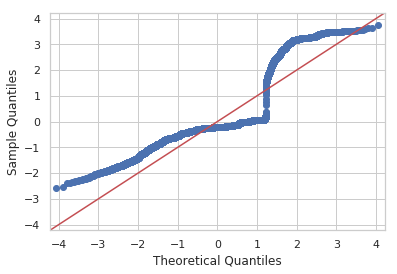

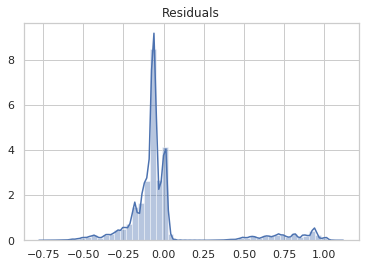

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     170.1
Date:                Fri, 10 May 2019   Prob (F-statistic):               0.00
Time:                        09:41:21   Log-Likelihood:                -7494.2
No. Observations:               40949   AIC:                         1.503e+04
Df Residuals:                   40928   BIC:                         1.521e+04
Df Model:                          20                                         
Covariance Type:                  HC0                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0894      0.009      9.865      0.000       0.072       0.107
contact               0.0294      0.006      5.289      0.000       0.018       0.040
campaign             -0.0035      0.000     -8.908      0.000      -0.004      -0.003
previous              0.0687      0.005     13.466      0.000       0.059       0.079
emp.var.rate         -0.0529      0.002    -25.530      0.000      -0.057      -0.049
blue-collar          -0.0197      0.004     -5.432      0.000      -0.027      -0.013
entrepreneur         -0.0179      0.007     -2.418      0.016      -0.032      -0.003
management           -0.0104      0.006     -1.752      0.080      -0.022       0.001
retired               0.0543      0.010      5.458      0.000       0.035       0.074
self-employed        -0.0144      0.008     -1.815      0.070      -0.030       0.001
services             -0.0162      0.005     -3.321      0.001      -0.026      -0.007
student               0.0775      0.015      5.117      0.000       0.048       0.107
university.degree     0.0132      0.004      3.556      0.000       0.006       0.020
aug                   0.0495      0.011      4.601      0.000       0.028       0.071
jul                   0.0675      0.010      6.494      0.000       0.047       0.088
jun                   0.0342      0.010      3.409      0.001       0.015       0.054
mar                   0.2781      0.023     12.247      0.000       0.234       0.323
may                  -0.0500      0.009     -5.788      0.000      -0.067      -0.033
nov                  -0.0272      0.010     -2.853      0.004      -0.046      -0.009
oct                   0.1586      0.021      7.676      0.000       0.118       0.199
sep                   0.1721      0.023      7.607      0.000       0.128       0.216
==============================================================================
Omnibus:                    16007.915   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54055.529
Skew:                           2.043   Prob(JB):                         0.00
Kurtosis:                       6.871   Cond. No.                         50.8
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

Variance Inflation Factors:
22.256482455231946 const
2.4233785564084105 contact
1.0356784365148746 campaign
1.246399675461921 previous
2.530441236530041 emp.var.rate
1.3448473517282271 blue-collar
1.0486043410819357 entrepreneur
1.1165978607146254 management
1.0825069936463478 retired
1.0420328074206757 self-employed
1.1737243388006797 services
1.0547967885363634 student
1.2910165058814842 university.degree
3.7328282795443504 aug
4.1607566907983085 jul
3.2063716551009387 jun
1.1984765704785563 mar
4.661425633846891 may
2.470421937751876 nov
1.2794056028783898 oct
1.225372344068541 sep


In [52]:
model2 = sm.OLS(Y,X2).fit(cov_type='HC0')
sm.qqplot(model2.resid, sc.norm, fit=True, line='45')
plt.show()
sns.distplot(model2.resid)
plt.title('Residuals')
plt.show()
display(model2.summary())
print("Variance Inflation Factors:")
print_VIF(X2)

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X2.values, Y.values, test_size=0.25)

reg = LinearRegression()
reg = reg.fit(X_train,Y_train)

y_hat = reg.predict(X_test)

print('Test accuracy:',np.round(reg.score(np.round(X_test), Y_test),3), ', MSE Loss is:', mean_squared_error(Y_test,y_hat))

Test accuracy: 0.15 , MSE Loss is: 0.08598067286415853


# Classification

In [54]:
def plot_hist2(df,df2,df_col):
    df = df.dropna()  
    df2 = df2.dropna() 
    for d in df_col:
        print("Empirical Distribution of Variable "+d)
        fig, axes = plt.subplots(1,2,figsize=(15,9))
        sns.distplot(df[d],ax=axes[0])
        sns.distplot(df2[d],ax=axes[1])
        axes[0].set_ylabel("Probability")
        axes[1].set_ylabel("Probability")
        plt.suptitle("Empirical Probability Distribution of Numerical Variable "+d)
        plt.show()
        
def get_num_cols(df):
    idx = df.select_dtypes(exclude='object').columns.values
    dF = df[idx].dropna() #remove NaNs or else it cant plot
    return dF.columns

def calculate_metrics(y_test,y_hat):
    c = confusion_matrix(y_test, y_hat)
    print("Confusion matrix is:")
    print(c)
    print("We have",c[0][0]+c[1][1],"correct observations and",c[0][1]+c[1][0], "misclassifications.")
    print(classification_report(y_test, y_hat))
    plt.figure(figsize=(6,6))
    sns.heatmap(c,cmap="YlGnBu",annot=True,fmt='g')
    plt.show()
    
def plot_ROC(y_test,X_test,classifier):
    roc = roc_auc_score(y_test, classifier.predict(X_test))
    fpr, tpr, _ = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
    plt.figure(figsize=(12,12))
    plt.plot(fpr, tpr, label='Classifier area ='+str(np.round(roc,2)))
    plt.plot([0, 1], [0, 1],'--')

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.legend()

    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.show()
    
    
def plot_ROC2(L_Y,L_X,L_YHAT,L_PROB,L_NAME):
    
    plt.figure(figsize=(12,12))
    for i in range(len(L_Y)):
        roc = roc_auc_score(L_Y[i], L_YHAT[i])
        fpr, tpr, _ = roc_curve(L_Y[i], L_PROB[i][:,1])
        plt.plot(fpr, tpr, label=L_NAME[i]+', area ='+str(np.round(roc,2)))
    plt.plot([0, 1], [0, 1],'--')

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.legend()

    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.show()

    
    
def MAE(y_test,y_hat):
    return np.abs(y_test-y_hat).sum()#/y_test.shape[0]


## Logistic Regression with PCA

In [55]:
pcaXmodel = PCA(n_components=5, whiten=True)
pc = pcaXmodel.fit_transform(X)#.fit_transform(StandardScaler().fit_transform(X))
print(pcaXmodel.explained_variance_ratio_[:5])

proj = pcaXmodel.inverse_transform(pc)
a = pd.DataFrame(proj)[list((np.ones((31,1))-1).cumsum().ravel())]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,  random_state=0)
lr = LogisticRegression().fit(X_train,y_train)

y_hat = lr.predict(X_test)
print('Test accuracy:',np.round(lr.score(X_test, y_test),3), ', Cross Entropy Loss is:', log_loss(y_test,y_hat))
print(MAE(y_test,y_hat))

#pcaXmodel = PCA(n_components=5).fit_transform(X)#.fit_transform(StandardScaler().fit_transform(X))

[0.89682543 0.05748223 0.02049602 0.00332848 0.00236297]
Test accuracy: 0.887 , Cross Entropy Loss is: 3.891070220963365
1384


Confusion matrix is:
[[10738   164]
 [ 1220   163]]
We have 10901 correct observations and 1384 misclassifications.
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     10902
           1       0.50      0.12      0.19      1383

   micro avg       0.89      0.89      0.89     12285
   macro avg       0.70      0.55      0.57     12285
weighted avg       0.85      0.89      0.86     12285



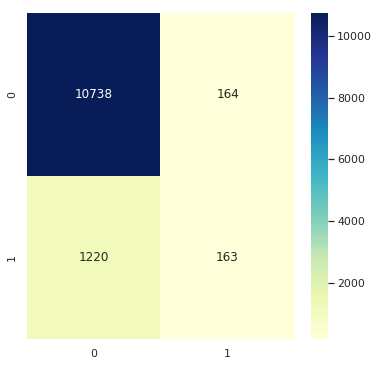

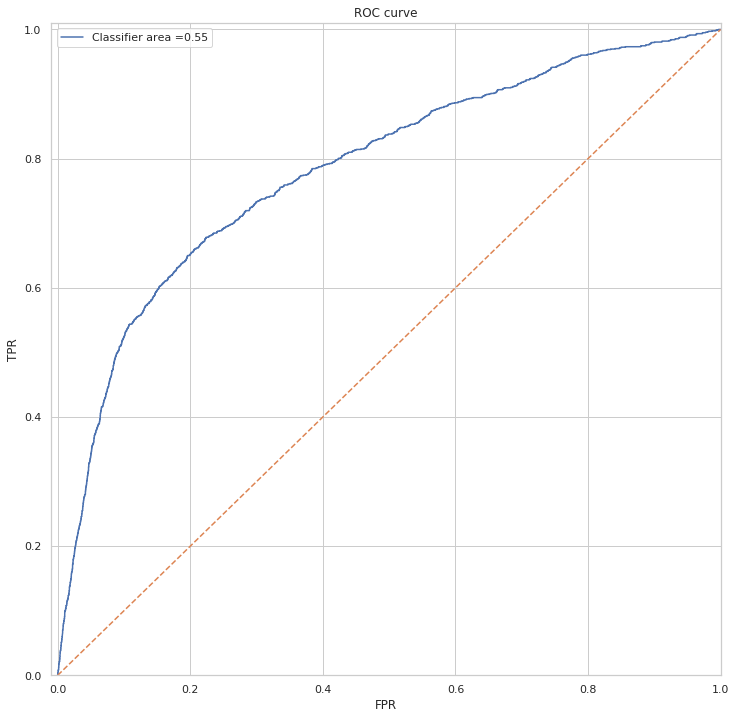

In [56]:
calculate_metrics(y_test,y_hat)
plot_ROC(y_test,X_test,lr)

In [57]:
a.shape

(40949, 31)

In [58]:
logit = sm.Logit(Y, X).fit()
display(logit.summary())    

Optimization terminated successfully.
         Current function value: 0.293657
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                40949
Model:                          Logit   Df Residuals:                    40918
Method:                           MLE   Df Model:                           30
Date:                Fri, 10 May 2019   Pseudo R-squ.:                  0.1574
Time:                        09:41:22   Log-Likelihood:                -12025.
converged:                       True   LL-Null:                       -14272.
                                        LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0212      0.001    -14.226      0.000      -0.024      -0.018
housing                -0.1317      0.034     -3.911      0.000      -0.198      -0.066
loan                   -0.0976      0.048     -2.041      0.041      -0.191      -0.004
contact                -0.2718      0.051     -5.286      0.000      -0.373      -0.171
campaign               -0.0809      0.010     -8.316      0.000      -0.100      -0.062
previous                0.3956      0.026     15.025      0.000       0.344       0.447
emp.var.rate           -0.4191      0.014    -31.042      0.000      -0.446      -0.393
blue-collar            -0.6728      0.060    -11.175      0.000      -0.791      -0.555
entrepreneur           -0.3880      0.105     -3.712      0.000      -0.593      -0.183
housemaid              -0.3722      0.121     -3.083      0.002      -0.609      -0.136
management             -0.2157      0.072     -2.995      0.003      -0.357      -0.075
retired                 0.4737      0.089      5.307      0.000       0.299       0.649
self-employed          -0.3719      0.100     -3.737      0.000      -0.567      -0.177
services               -0.4385      0.071     -6.196      0.000      -0.577      -0.300
student                -0.0591      0.089     -0.661      0.508      -0.234       0.116
technician             -0.2928      0.058     -5.034      0.000      -0.407      -0.179
unemployed             -0.1958      0.106     -1.852      0.064      -0.403       0.011
married                -0.0647      0.037     -1.744      0.081      -0.137       0.008
basic.6y               -0.4429      0.090     -4.899      0.000      -0.620      -0.266
basic.9y               -0.5959      0.067     -8.955      0.000      -0.726      -0.466
high.school            -0.7139      0.059    -12.147      0.000      -0.829      -0.599
professional.course    -0.5177      0.071     -7.287      0.000      -0.657      -0.378
university.degree      -0.6187      0.056    -11.008      0.000      -0.729      -0.509
aug                    -0.2188      0.065     -3.356      0.001      -0.347      -0.091
jul                     0.0508      0.066      0.770      0.441      -0.079       0.180
jun                    -0.0506      0.069     -0.738      0.460      -0.185       0.084
mar                     0.9585      0.098      9.742      0.000       0.766       1.151
may                    -0.9770      0.056    -17.524      0.000      -1.086      -0.868
nov                    -0.6597      0.070     -9.472      0.000      -0.796      -0.523
oct                     0.2908      0.093      3.141      0.002       0.109       0.472
sep                     0.4116      0.100      4.125      0.000       0.216       0.607
=======================================================================================
"""

In [59]:
sns.set_style('whitegrid')
alpha = 0.05
a = logit.pvalues < alpha

X3 = X[X.columns[a]]
print("Not Statistically significant regressors are:")
print(list(X.columns[~a]))

Not Statistically significant regressors are:
['student', 'unemployed', 'married', 'jul', 'jun']


Optimization terminated successfully.
         Current function value: 0.293765
         Iterations 7


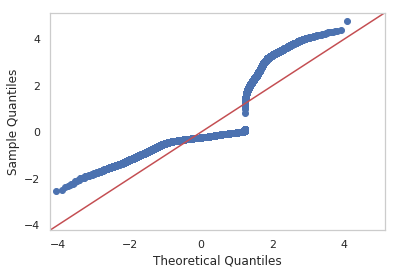

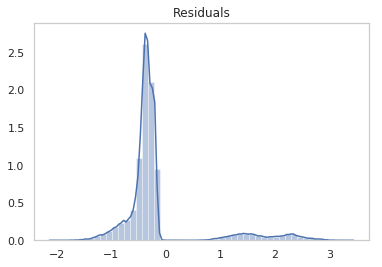

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                40949
Model:                          Logit   Df Residuals:                    40923
Method:                           MLE   Df Model:                           25
Date:                Fri, 10 May 2019   Pseudo R-squ.:                  0.1571
Time:                        09:41:23   Log-Likelihood:                -12029.
converged:                       True   LL-Null:                       -14272.
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0222      0.001    -16.864      0.000      -0.025      -0.020
x2            -0.1322      0.034     -3.933      0.000      -0.198      -0.066
x3            -0.0983      0.048     -2.056      0.040      -0.192      -0.005
x4            -0.3065      0.047     -6.545      0.000      -0.398      -0.215
x5            -0.0808      0.010     -8.368      0.000      -0.100      -0.062
x6             0.3958      0.026     15.080      0.000       0.344       0.447
x7            -0.4120      0.012    -34.192      0.000      -0.436      -0.388
x8            -0.6576      0.058    -11.315      0.000      -0.771      -0.544
x9            -0.3789      0.104     -3.654      0.000      -0.582      -0.176
x10           -0.3499      0.120     -2.926      0.003      -0.584      -0.115
x11           -0.2092      0.071     -2.945      0.003      -0.348      -0.070
x12            0.5154      0.088      5.883      0.000       0.344       0.687
x13           -0.3578      0.099     -3.619      0.000      -0.552      -0.164
x14           -0.4204      0.070     -6.049      0.000      -0.557      -0.284
x15           -0.2723      0.057     -4.803      0.000      -0.383      -0.161
x16           -0.4510      0.089     -5.055      0.000      -0.626      -0.276
x17           -0.6044      0.065     -9.345      0.000      -0.731      -0.478
x18           -0.7081      0.056    -12.750      0.000      -0.817      -0.599
x19           -0.5204      0.069     -7.513      0.000      -0.656      -0.385
x20           -0.6062      0.053    -11.404      0.000      -0.710      -0.502
x21           -0.2360      0.054     -4.407      0.000      -0.341      -0.131
x22            0.9616      0.093     10.318      0.000       0.779       1.144
x23           -0.9757      0.045    -21.651      0.000      -1.064      -0.887
x24           -0.6705      0.061    -11.028      0.000      -0.790      -0.551
x25            0.2946      0.088      3.356      0.001       0.123       0.467
x26            0.4072      0.095      4.302      0.000       0.222       0.593
==============================================================================
"""

Variance Inflation Factors:
10.641927479960694 age
2.12376251948612 housing
1.1817724574171478 loan
2.5785493247269375 contact
1.9657814528182098 campaign
1.3877358583478385 previous
1.8229027986855442 emp.var.rate
2.348841197881889 blue-collar
1.1413373133542628 entrepreneur
1.1511689284465119 housemaid
1.295649594071477 management
1.4859115892661128 retired
1.1260833322475545 self-employed
1.4482851007151283 services
1.9007118669765863 technician
1.4012552819687862 basic.6y
2.0101356633935246 basic.9y
2.6767392619499866 high.school
2.310432042606364 professional.course
3.3193480252212413 university.degree
1.6389507882017431 aug
1.0730789321447327 mar
2.2099839732346434 may
1.345191261149427 nov
1.1414486613991377 oct
1.1067035206093012 sep


In [60]:
model2 = sm.Logit(Y.values,X3.values).fit()
sm.qqplot(model2.resid_dev, sc.norm, fit=True, line='45')
plt.grid()
plt.show()
sns.distplot(model2.resid_dev)
plt.title('Residuals')
plt.grid()
plt.show()
display(model2.summary())
print("Variance Inflation Factors:")
print_VIF(X3)

In [61]:
logit = sm.Logit(Y.values, pc).fit()
display(logit.summary()) 

Optimization terminated successfully.
         Current function value: 0.673021
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                40949
Model:                          Logit   Df Residuals:                    40944
Method:                           MLE   Df Model:                            4
Date:                Fri, 10 May 2019   Pseudo R-squ.:                 -0.9310
Time:                        09:41:24   Log-Likelihood:                -27560.
converged:                       True   LL-Null:                       -14272.
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0352      0.010      3.449      0.001       0.015       0.055
x2            -0.1188      0.010    -11.713      0.000      -0.139      -0.099
x3             0.3641      0.010     35.554      0.000       0.344       0.384
x4            -0.1410      0.010    -13.986      0.000      -0.161      -0.121
x5            -0.0238      0.010     -2.366      0.018      -0.043      -0.004
==============================================================================
"""

### AdaBoost Classifier

Test accuracy: 0.889 , Cross Entropy Loss is: 3.820788578868904
Confusion matrix is:
[[32069   715]
 [ 3362   709]]
We have 32778 correct observations and 4077 misclassifications.
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     32784
           1       0.50      0.17      0.26      4071

   micro avg       0.89      0.89      0.89     36855
   macro avg       0.70      0.58      0.60     36855
weighted avg       0.86      0.89      0.86     36855



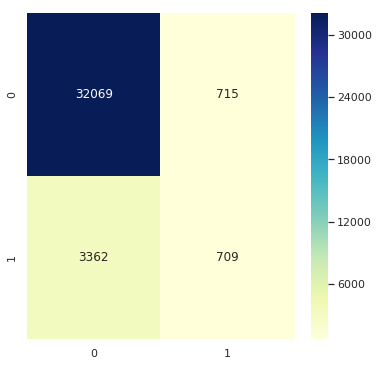

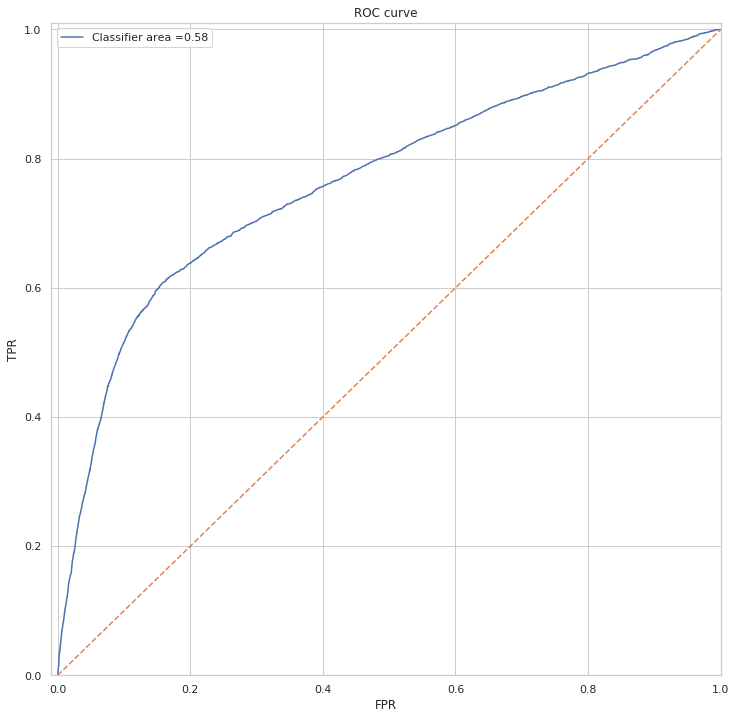

4077

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=0.9)

clf_rdfore = AdaBoostClassifier()
clf_rdfore = clf_rdfore.fit(X_train,Y_train)

y_hat = clf_rdfore.predict(X_test)


print('Test accuracy:',np.round(clf_rdfore.score(X_test, Y_test),3), ', Cross Entropy Loss is:', log_loss(Y_test,y_hat))
calculate_metrics(Y_test,y_hat)
plot_ROC(Y_test,X_test,clf_rdfore)
MAE(Y_test,y_hat)

### SVC 

# Unbalanced Data Problem

In [63]:
sns.set_style('whitegrid')

In [64]:
def make_balanced(X,Y):
    DF = X.copy()
    DF['Y'] = Y
    DF_Yes = DF[DF.Y==1]#.info()
    DF_No = DF[DF.Y==0]#.info()
    DF_B = DF_No.sample(len(DF_Yes))
    D = pd.concat([DF_B,DF_Yes])
    D = D.reindex(np.random.permutation(D.index))
    D = D[:int(len(D)/2)]#, D[int(len(D)/2):]
    return D

In [65]:
D = make_balanced(X,Y)

In [66]:
D.shape

(4544, 32)

In [67]:
X_B = D.drop(columns='Y')
Y_B = D['Y']

Test accuracy: 0.711 , Cross Entropy Loss is: 9.97254525601462
Confusion matrix is:
[[441 116]
 [212 367]]
We have 808 correct observations and 328 misclassifications.
              precision    recall  f1-score   support

           0       0.68      0.79      0.73       557
           1       0.76      0.63      0.69       579

   micro avg       0.71      0.71      0.71      1136
   macro avg       0.72      0.71      0.71      1136
weighted avg       0.72      0.71      0.71      1136



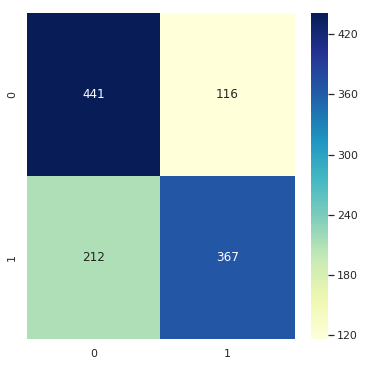

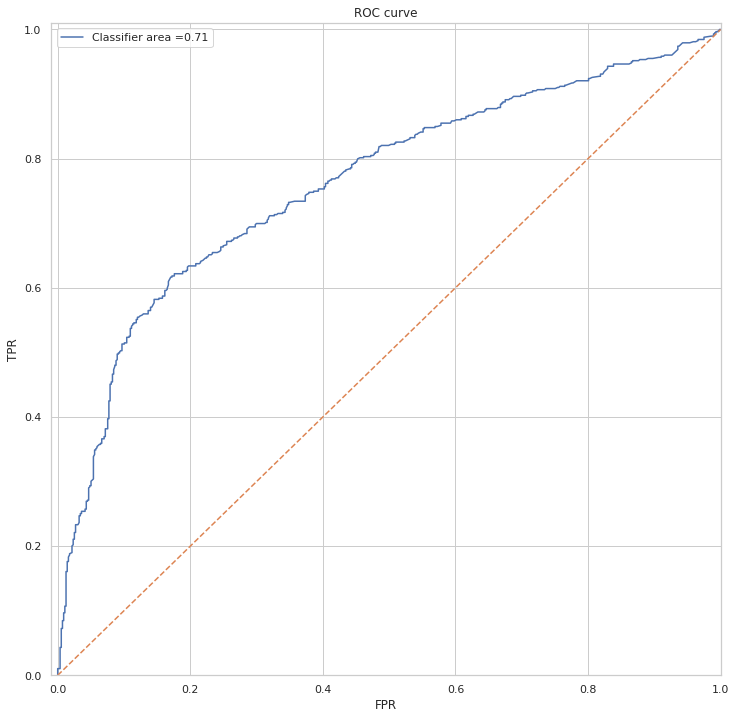

328

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X_B.values, Y_B.values, test_size=0.25)
clf_rdfore = AdaBoostClassifier()
clf_rdfore = clf_rdfore.fit(X_train,Y_train)

y_hat = clf_rdfore.predict(X_test)


print('Test accuracy:',np.round(clf_rdfore.score(X_test, Y_test),3), ', Cross Entropy Loss is:', log_loss(Y_test,y_hat))
calculate_metrics(Y_test,y_hat)
plot_ROC(Y_test,X_test,clf_rdfore)
MAE(Y_test,y_hat)

In [69]:
X_R = X.drop(D.index)
Y_R = Y.drop(D.index)

In [70]:
C = [LogisticRegression(), AdaBoostClassifier(), KNeighborsClassifier(), RandomForestClassifier()]

def calc_sampling_imb(X,Y):
    L_NAME = ['lr','ada','knn','rforest']
    L_X, L_Y, L_YHAT, L_PROB = [],[],[],[]

    for cl in C:   
        y_hat = cross_val_predict(cl, X, Y, cv=10, n_jobs=-1)
        probs = cross_val_predict(cl, X, Y, cv=10, method='predict_proba',n_jobs=-1)

        #print('Test accuracy:',np.round(c.score(X_R, Y_R),3), ', Cross Entropy Loss is:', log_loss(Y_R,y_hat))
        calculate_metrics(Y,y_hat)
        #plot_ROC(Y_R,X,c)
        print('MAE:',MAE(Y,y_hat))

                        #L_NAME.append(name)
        L_X.append(X.values)
        L_Y.append(Y.values)
        L_YHAT.append(y_hat)
        L_PROB.append(probs)

    plot_ROC2(L_Y,L_X,L_YHAT,L_PROB,L_NAME)

    #plot_ROC3(L_Y,L_X,L_CLASS,L_NAME)


Confusion matrix is:
[[30070  4062]
 [ 2078   195]]
We have 30265 correct observations and 6140 misclassifications.
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     34132
           1       0.05      0.09      0.06      2273

   micro avg       0.83      0.83      0.83     36405
   macro avg       0.49      0.48      0.48     36405
weighted avg       0.88      0.83      0.85     36405



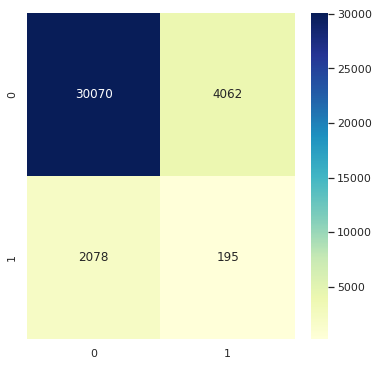

MAE: 6140
Confusion matrix is:
[[32038  2094]
 [ 2111   162]]
We have 32200 correct observations and 4205 misclassifications.
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     34132
           1       0.07      0.07      0.07      2273

   micro avg       0.88      0.88      0.88     36405
   macro avg       0.50      0.50      0.50     36405
weighted avg       0.88      0.88      0.88     36405



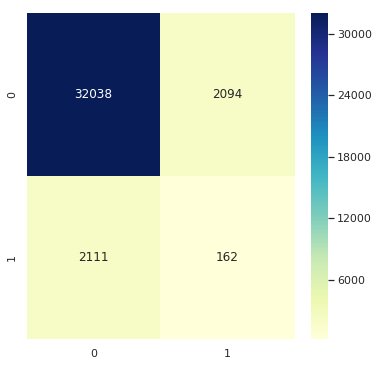

MAE: 4205
Confusion matrix is:
[[32119  2013]
 [ 2167   106]]
We have 32225 correct observations and 4180 misclassifications.
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     34132
           1       0.05      0.05      0.05      2273

   micro avg       0.89      0.89      0.89     36405
   macro avg       0.49      0.49      0.49     36405
weighted avg       0.88      0.89      0.88     36405



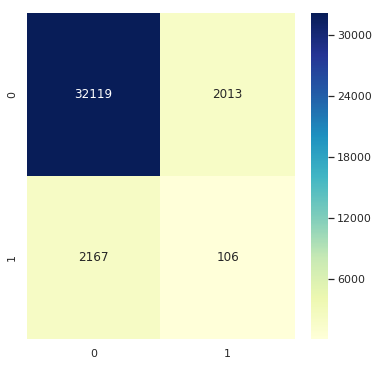

MAE: 4180
Confusion matrix is:
[[29670  4462]
 [ 2105   168]]
We have 29838 correct observations and 6567 misclassifications.
              precision    recall  f1-score   support

           0       0.93      0.87      0.90     34132
           1       0.04      0.07      0.05      2273

   micro avg       0.82      0.82      0.82     36405
   macro avg       0.49      0.47      0.47     36405
weighted avg       0.88      0.82      0.85     36405



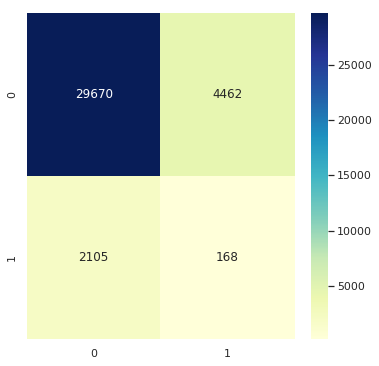

MAE: 6567


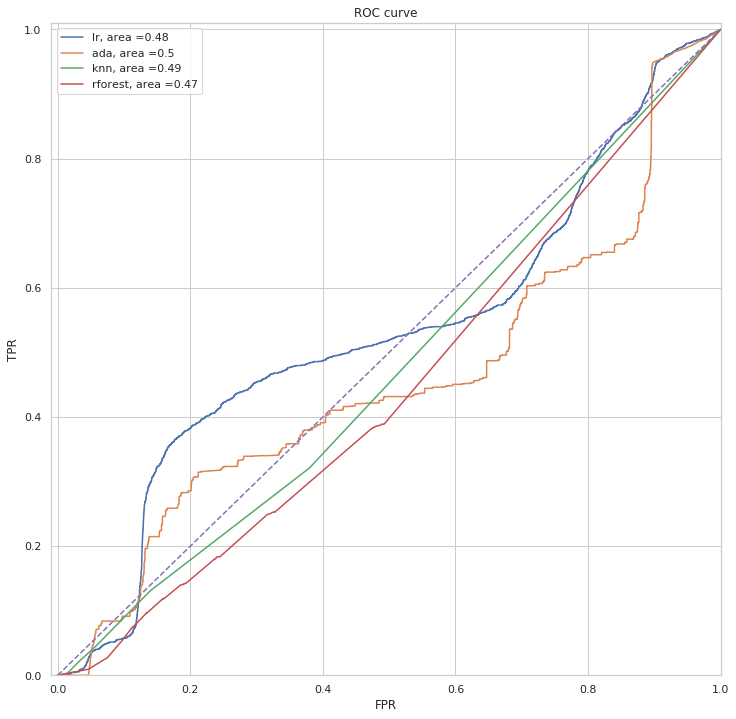

In [71]:
calc_sampling_imb(X_R,Y_R)

In [72]:
def train_B_test(X,Y):
    L_NAME = ['lr','ada','knn','rforest']
    L_X, L_Y, L_YHAT, L_PROB = [],[],[],[]
    
    D = make_balanced(X,Y)
    X_B = D.drop(columns='Y')
    Y_B = D['Y']
    
    X_R = X.drop(D.index)
    Y_R = Y.drop(D.index)
    
    for i,cl in enumerate(C):
    
        c = cl.fit(X_B,Y_B)
        y_hat = c.predict(X_R)
        probs = c.predict_proba(X_R)
        print(L_NAME[i])
        print('Test accuracy:',np.round(c.score(X_R, Y_R),3), ', Cross Entropy Loss is:', log_loss(Y_R,y_hat))
        calculate_metrics(Y_R,y_hat)
        MAE(Y_R,y_hat)

        L_X.append(X_R.values)
        L_Y.append(Y_R.values)
        L_YHAT.append(y_hat)
        L_PROB.append(probs)

    plot_ROC2(L_Y,L_X,L_YHAT,L_PROB,L_NAME)

lr
Test accuracy: 0.791 , Cross Entropy Loss is: 7.210551063786056
Confusion matrix is:
[[27377  6767]
 [  833  1428]]
We have 28805 correct observations and 7600 misclassifications.
              precision    recall  f1-score   support

           0       0.97      0.80      0.88     34144
           1       0.17      0.63      0.27      2261

   micro avg       0.79      0.79      0.79     36405
   macro avg       0.57      0.72      0.58     36405
weighted avg       0.92      0.79      0.84     36405



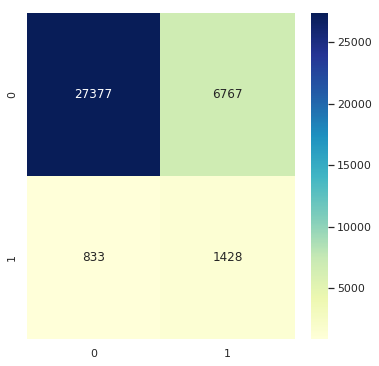

ada
Test accuracy: 0.812 , Cross Entropy Loss is: 6.481903791233194
Confusion matrix is:
[[28157  5987]
 [  845  1416]]
We have 29573 correct observations and 6832 misclassifications.
              precision    recall  f1-score   support

           0       0.97      0.82      0.89     34144
           1       0.19      0.63      0.29      2261

   micro avg       0.81      0.81      0.81     36405
   macro avg       0.58      0.73      0.59     36405
weighted avg       0.92      0.81      0.85     36405



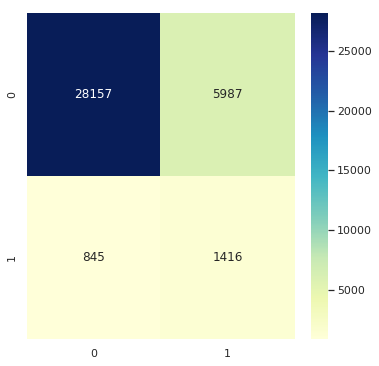

knn
Test accuracy: 0.71 , Cross Entropy Loss is: 10.01128901491563
Confusion matrix is:
[[24379  9765]
 [  787  1474]]
We have 25853 correct observations and 10552 misclassifications.
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     34144
           1       0.13      0.65      0.22      2261

   micro avg       0.71      0.71      0.71     36405
   macro avg       0.55      0.68      0.52     36405
weighted avg       0.92      0.71      0.78     36405



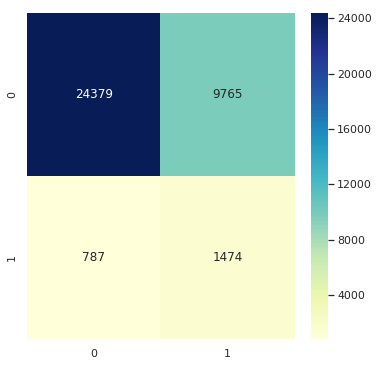

rforest
Test accuracy: 0.724 , Cross Entropy Loss is: 9.516983577294875
Confusion matrix is:
[[24988  9156]
 [  875  1386]]
We have 26374 correct observations and 10031 misclassifications.
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     34144
           1       0.13      0.61      0.22      2261

   micro avg       0.72      0.72      0.72     36405
   macro avg       0.55      0.67      0.52     36405
weighted avg       0.91      0.72      0.79     36405



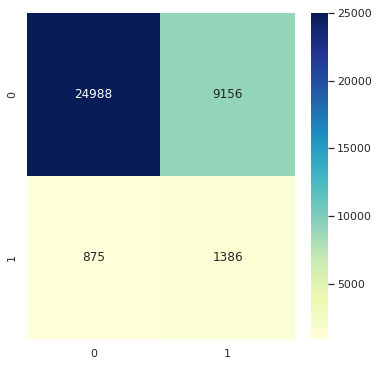

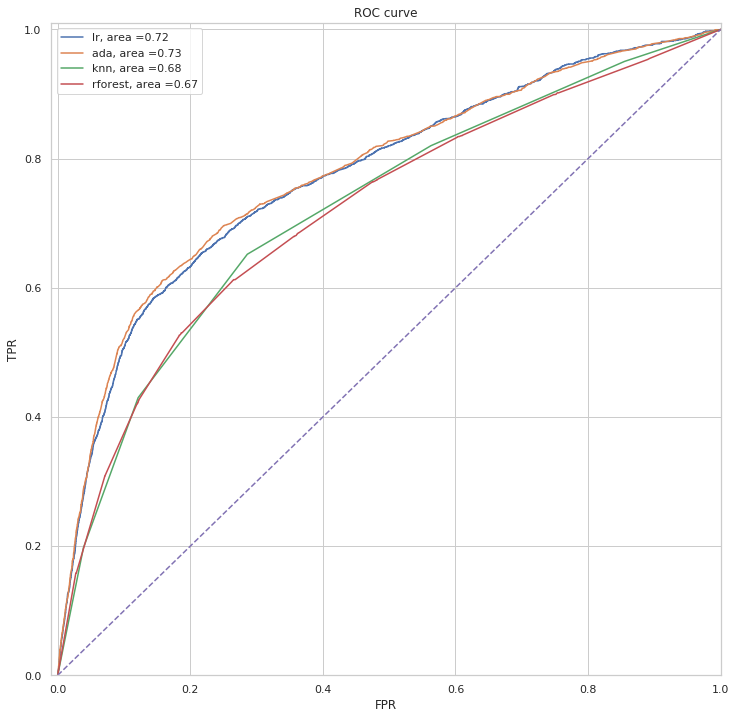

In [73]:
train_B_test(X,Y)

## Test Over/Under Sampling Methods

In [74]:
sns.set_style('whitegrid')

In [75]:
def calc_performance(c,name):

    classifier = [name, c]

    over_samplers = [
        #['ADA-SYN', ADASYN()],
        ['ROS', RandomOverSampler()],
        ['RUS', RandomUnderSampler()],
        #['SMOTENC', SMOTENC()],
        ['SMOTEENN', SMOTEENN()],
        ['ENN', EditedNearestNeighbours()],
    ]

    pipelines = [
        ['{}-{}'.format(s[0], classifier[0]),
         make_pipeline(s[1], classifier[1])]
        for s in over_samplers
    ]


    calc_sampling(pipelines,X,Y)


def calc_sampling(pipelines,X,Y):
    L_NAME, L_X, L_Y, L_YHAT, L_PROB = [],[],[],[],[]
    
    X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=0.25)
    for name, pipeline in pipelines:
        
        p = pipeline.fit(X_train,Y_train)
        y_hat = p.predict(X_test)
        probs = p.predict_proba(X_test)
        calculate_metrics(Y_test,y_hat)

        L_NAME.append(name)
        L_X.append(X_test)
        L_Y.append(Y_test)
        L_YHAT.append(y_hat)
        L_PROB.append(probs)
   
    plot_ROC2(L_Y,L_X,L_YHAT,L_PROB,L_NAME)



Confusion matrix is:
[[7359 1770]
 [ 409  700]]
We have 8059 correct observations and 2179 misclassifications.
              precision    recall  f1-score   support

           0       0.95      0.81      0.87      9129
           1       0.28      0.63      0.39      1109

   micro avg       0.79      0.79      0.79     10238
   macro avg       0.62      0.72      0.63     10238
weighted avg       0.88      0.79      0.82     10238



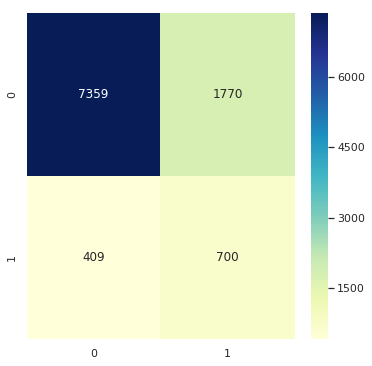

Confusion matrix is:
[[7418 1711]
 [ 415  694]]
We have 8112 correct observations and 2126 misclassifications.
              precision    recall  f1-score   support

           0       0.95      0.81      0.87      9129
           1       0.29      0.63      0.39      1109

   micro avg       0.79      0.79      0.79     10238
   macro avg       0.62      0.72      0.63     10238
weighted avg       0.88      0.79      0.82     10238



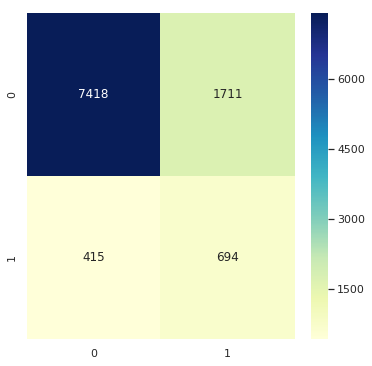

Confusion matrix is:
[[6422 2707]
 [ 320  789]]
We have 7211 correct observations and 3027 misclassifications.
              precision    recall  f1-score   support

           0       0.95      0.70      0.81      9129
           1       0.23      0.71      0.34      1109

   micro avg       0.70      0.70      0.70     10238
   macro avg       0.59      0.71      0.58     10238
weighted avg       0.87      0.70      0.76     10238



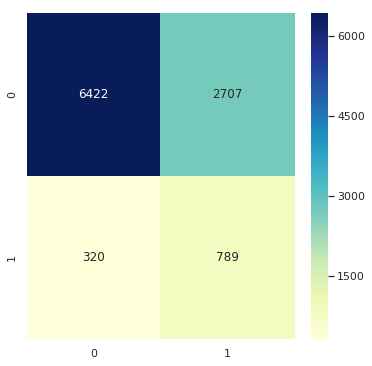

Confusion matrix is:
[[8548  581]
 [ 665  444]]
We have 8992 correct observations and 1246 misclassifications.
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      9129
           1       0.43      0.40      0.42      1109

   micro avg       0.88      0.88      0.88     10238
   macro avg       0.68      0.67      0.67     10238
weighted avg       0.87      0.88      0.88     10238



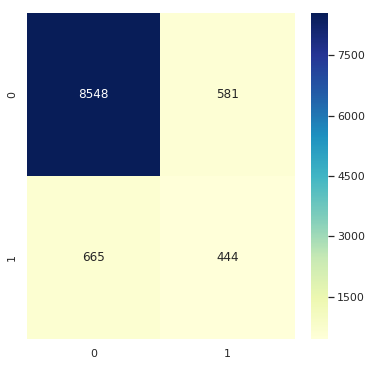

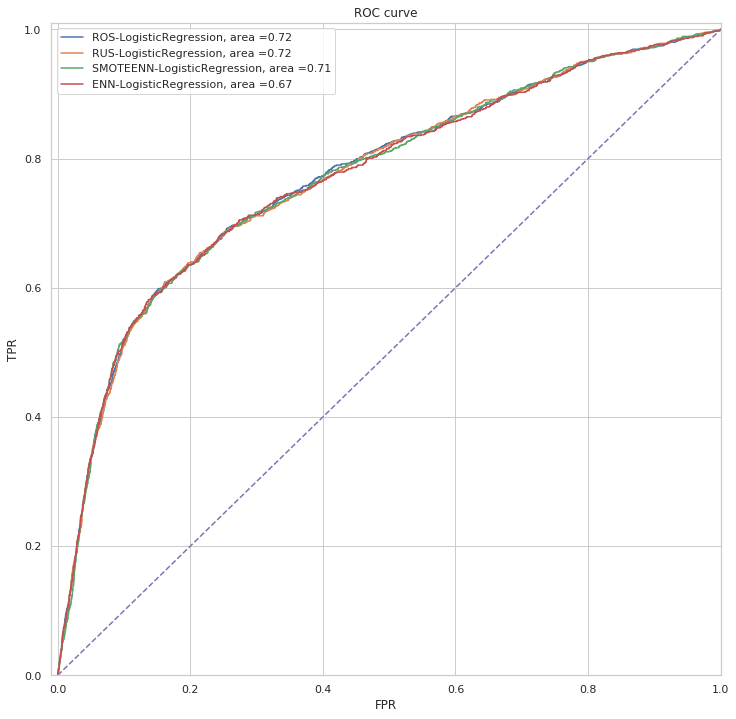

Confusion matrix is:
[[7515 1512]
 [ 465  746]]
We have 8261 correct observations and 1977 misclassifications.
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      9027
           1       0.33      0.62      0.43      1211

   micro avg       0.81      0.81      0.81     10238
   macro avg       0.64      0.72      0.66     10238
weighted avg       0.87      0.81      0.83     10238



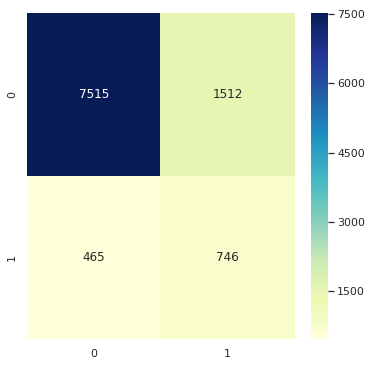

Confusion matrix is:
[[7555 1472]
 [ 464  747]]
We have 8302 correct observations and 1936 misclassifications.
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      9027
           1       0.34      0.62      0.44      1211

   micro avg       0.81      0.81      0.81     10238
   macro avg       0.64      0.73      0.66     10238
weighted avg       0.87      0.81      0.83     10238



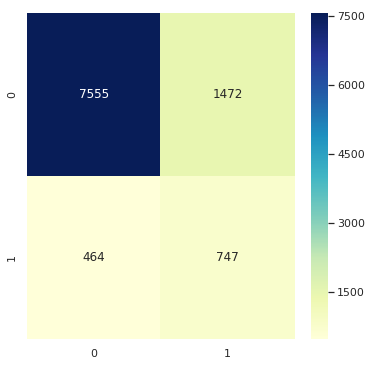

Confusion matrix is:
[[7577 1450]
 [ 475  736]]
We have 8313 correct observations and 1925 misclassifications.
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      9027
           1       0.34      0.61      0.43      1211

   micro avg       0.81      0.81      0.81     10238
   macro avg       0.64      0.72      0.66     10238
weighted avg       0.87      0.81      0.83     10238



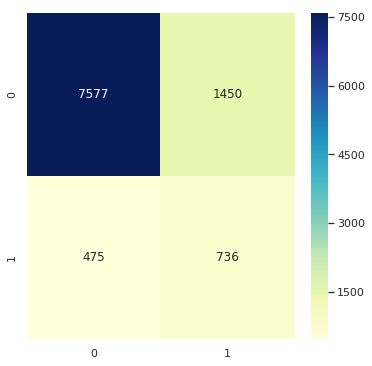

Confusion matrix is:
[[8382  645]
 [ 701  510]]
We have 8892 correct observations and 1346 misclassifications.
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      9027
           1       0.44      0.42      0.43      1211

   micro avg       0.87      0.87      0.87     10238
   macro avg       0.68      0.67      0.68     10238
weighted avg       0.87      0.87      0.87     10238



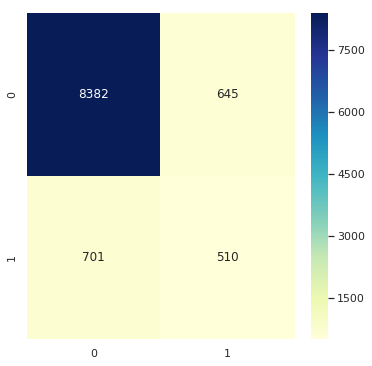

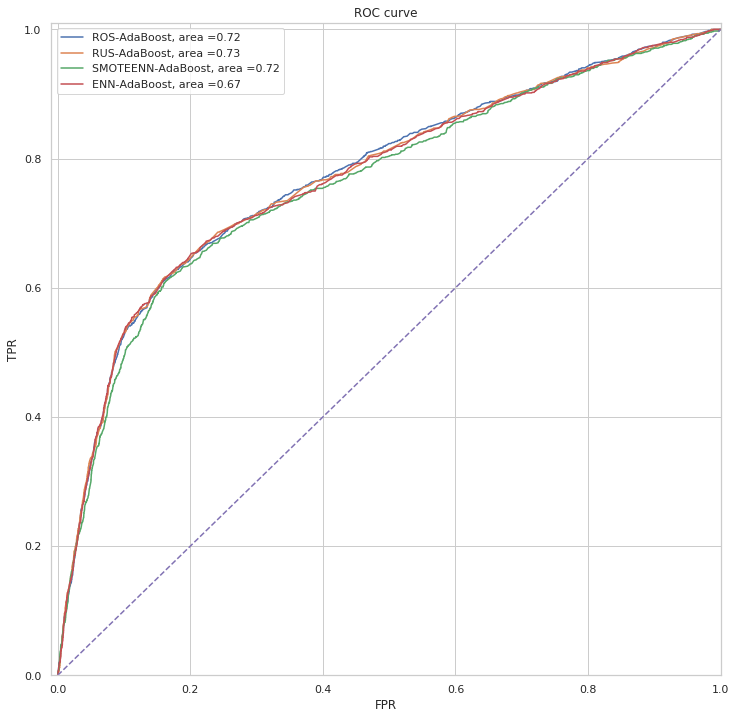

Confusion matrix is:
[[6970 2204]
 [ 515  549]]
We have 7519 correct observations and 2719 misclassifications.
              precision    recall  f1-score   support

           0       0.93      0.76      0.84      9174
           1       0.20      0.52      0.29      1064

   micro avg       0.73      0.73      0.73     10238
   macro avg       0.57      0.64      0.56     10238
weighted avg       0.86      0.73      0.78     10238



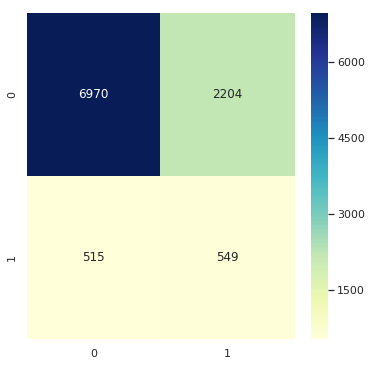

Confusion matrix is:
[[6562 2612]
 [ 381  683]]
We have 7245 correct observations and 2993 misclassifications.
              precision    recall  f1-score   support

           0       0.95      0.72      0.81      9174
           1       0.21      0.64      0.31      1064

   micro avg       0.71      0.71      0.71     10238
   macro avg       0.58      0.68      0.56     10238
weighted avg       0.87      0.71      0.76     10238



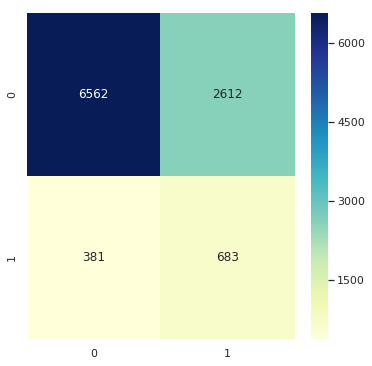

Confusion matrix is:
[[5810 3364]
 [ 332  732]]
We have 6542 correct observations and 3696 misclassifications.
              precision    recall  f1-score   support

           0       0.95      0.63      0.76      9174
           1       0.18      0.69      0.28      1064

   micro avg       0.64      0.64      0.64     10238
   macro avg       0.56      0.66      0.52     10238
weighted avg       0.87      0.64      0.71     10238



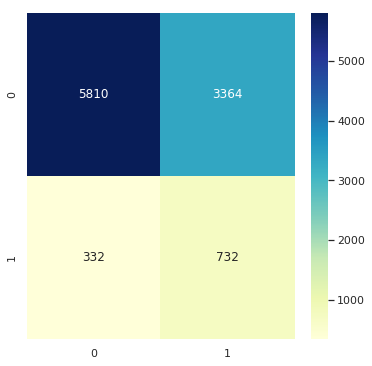

Confusion matrix is:
[[8412  762]
 [ 647  417]]
We have 8829 correct observations and 1409 misclassifications.
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      9174
           1       0.35      0.39      0.37      1064

   micro avg       0.86      0.86      0.86     10238
   macro avg       0.64      0.65      0.65     10238
weighted avg       0.87      0.86      0.87     10238



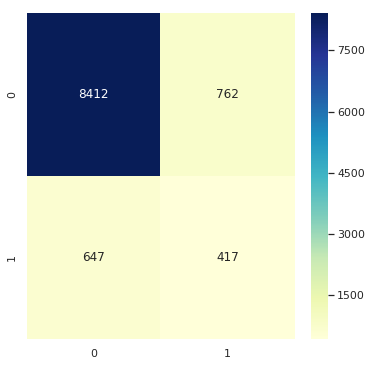

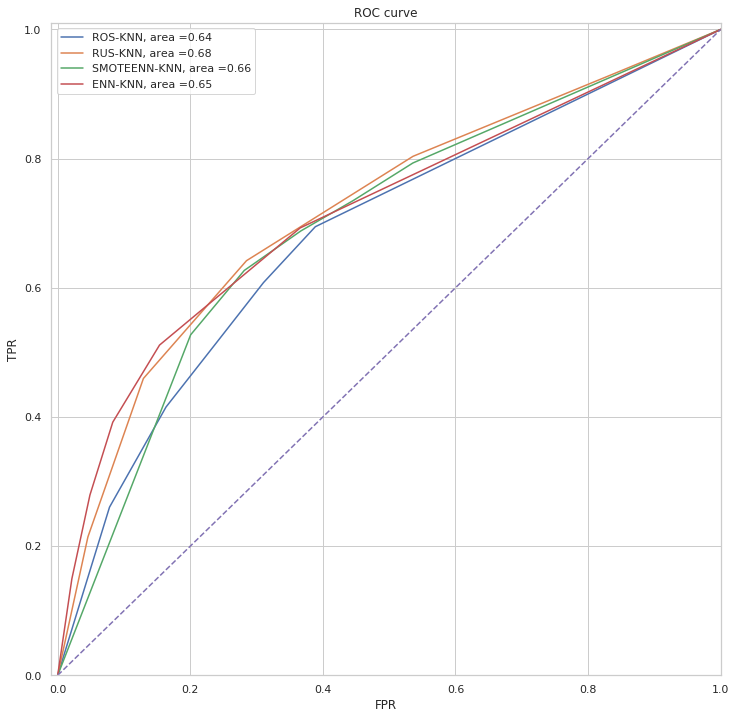

Confusion matrix is:
[[8330  801]
 [ 751  356]]
We have 8686 correct observations and 1552 misclassifications.
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      9131
           1       0.31      0.32      0.31      1107

   micro avg       0.85      0.85      0.85     10238
   macro avg       0.61      0.62      0.61     10238
weighted avg       0.85      0.85      0.85     10238



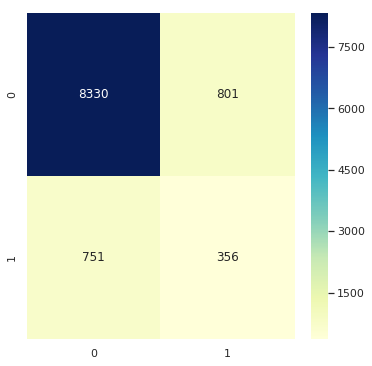

Confusion matrix is:
[[6726 2405]
 [ 395  712]]
We have 7438 correct observations and 2800 misclassifications.
              precision    recall  f1-score   support

           0       0.94      0.74      0.83      9131
           1       0.23      0.64      0.34      1107

   micro avg       0.73      0.73      0.73     10238
   macro avg       0.59      0.69      0.58     10238
weighted avg       0.87      0.73      0.77     10238



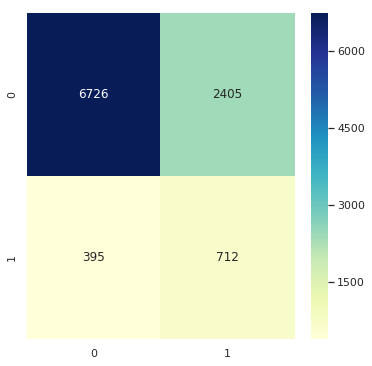

Confusion matrix is:
[[7972 1159]
 [ 514  593]]
We have 8565 correct observations and 1673 misclassifications.
              precision    recall  f1-score   support

           0       0.94      0.87      0.91      9131
           1       0.34      0.54      0.41      1107

   micro avg       0.84      0.84      0.84     10238
   macro avg       0.64      0.70      0.66     10238
weighted avg       0.87      0.84      0.85     10238



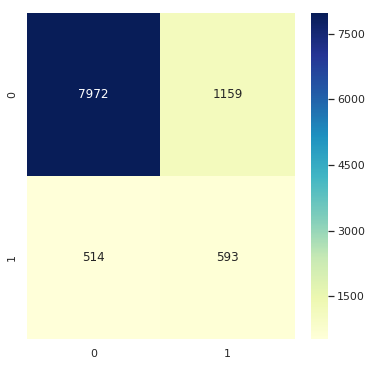

Confusion matrix is:
[[8206  925]
 [ 575  532]]
We have 8738 correct observations and 1500 misclassifications.
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      9131
           1       0.37      0.48      0.41      1107

   micro avg       0.85      0.85      0.85     10238
   macro avg       0.65      0.69      0.67     10238
weighted avg       0.87      0.85      0.86     10238



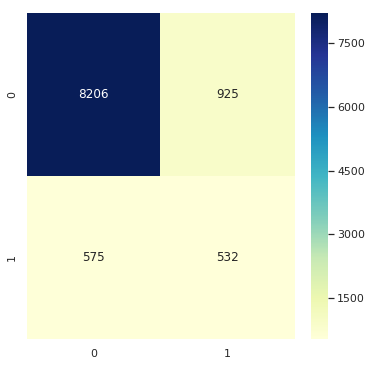

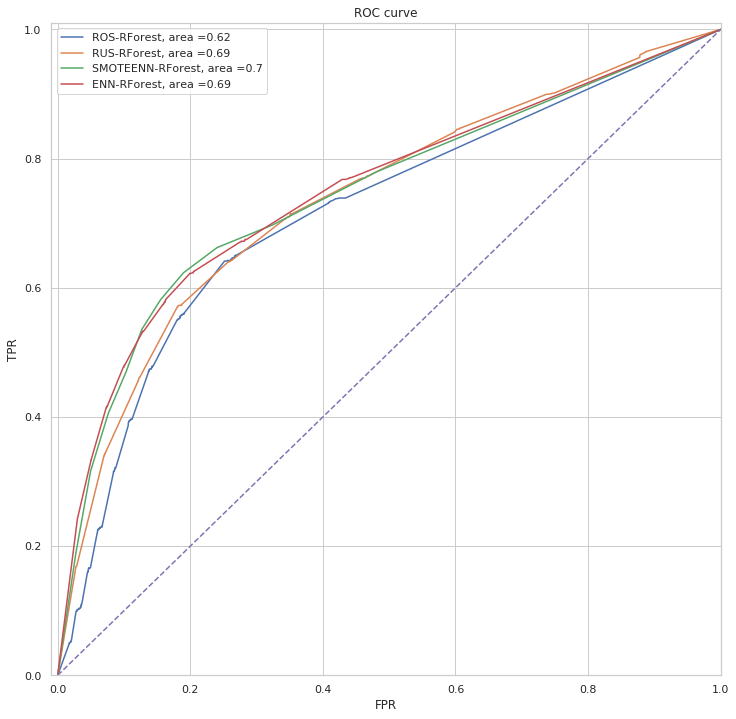

In [76]:
NAME = ['LogisticRegression','AdaBoost','KNN','RForest']
C_dict = dict(zip(NAME,C))

for name,c in C_dict.items():
    calc_performance(c,name)

## selection of relevant variables from balanced dataset

In [77]:
L, Counts,Coeffs = [],[],[]
for i in range(1000):
    D = make_balanced(X,Y)
    X_B = D.drop(columns='Y')
    Y_B = D['Y']

    logit = sm.Logit(Y_B, X_B).fit(disp=0)
    #display(logit.summary())  

    alpha = 0.10
    a = logit.pvalues < alpha

    X4 = X_B[X_B.columns[a]]
    #print("Not Statistically significant regressors are:")
    temp = list(X_B.columns[a])
    L.append(temp)
    Counts.append(len(temp))
    Coeffs.append(logit.params.loc[temp])


In [78]:
L = [y for x in L for y in x]

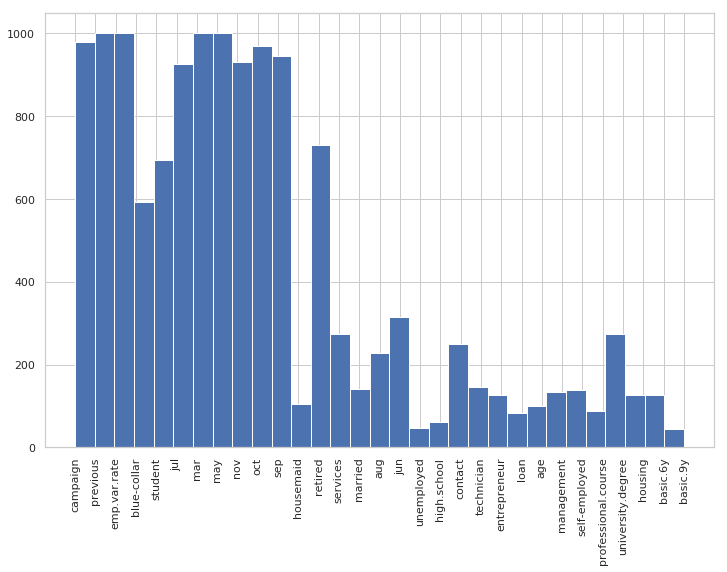

In [79]:
plt.figure(figsize=(12,8))
plt.hist(L,bins=len(set(L)))
plt.xticks(rotation=90)
plt.show()

In [80]:
from collections import Counter
d = Counter(L)

import operator
sorted_d = dict(sorted(d.items(), key=operator.itemgetter(1), reverse=True))

In [81]:
TopVars = []
print('Most frequently significant variables:')
for i, (k,v) in enumerate(sorted_d.items()):
    if v > 500:
        print(k, ':',v)
        TopVars.append(k)
        

Most frequently significant variables:
previous : 1000
emp.var.rate : 1000
mar : 1000
may : 1000
campaign : 980
oct : 969
sep : 944
nov : 930
jul : 925
retired : 729
student : 693
blue-collar : 592


In [82]:
V = []
for v in TopVars:
    summ = 0
    count = 0
    for c in Coeffs:
        try:
            summ += c.loc[v]
            count +=1
        except KeyError:
            pass
    V.append(summ/count)

In [83]:
list(np.round(np.array(V),3))

[0.345,
 -0.474,
 1.284,
 -0.65,
 -0.052,
 0.854,
 0.838,
 -0.448,
 0.434,
 0.501,
 0.552,
 -0.281]

In [84]:
list(np.round(np.exp(np.array(V)),3))

[1.413,
 0.622,
 3.613,
 0.522,
 0.949,
 2.35,
 2.311,
 0.639,
 1.544,
 1.65,
 1.736,
 0.755]